# 1. Importation des données

## Importation des librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Importation des dataset et création des dataframes

In [2]:
def read_df(dataset):
    return (pd.DataFrame(pd.read_csv(dataset)))

pop_df = read_df("population.csv")
sous_df = read_df("sous_nutrition.csv")
aide_df = read_df("aide_alimentaire.csv")
dispo_df = read_df("dispo_alimentaire.csv")
count_df = read_df("Countries.csv")
dispo_2017 = read_df("dispo_2017.csv")
dispo_2017_vege = read_df("dispo_vege.csv")

# 2. Etude de la sous-nutrition :

## Préparation des dataframes

In [3]:
pop_count = pop_df.groupby(['Zone']).sum()
pop_count.reset_index(0, inplace=True)
merged_pop = pd.merge(left=pop_count, right=count_df, how='left', left_on='Zone', right_on='Country or Area')
merged_pop = merged_pop[['Zone', 'Region Name', 'Sub-region Name']]

pop_df['Valeur'] = pop_df['Valeur']*1000
pop = pd.merge(left=pop_df, right=merged_pop, how="left", on="Zone")
pop_2017 = pop[pop["Année"] == 2017]
pop_2013 = pop[pop["Année"] == 2013]

sous_df['Valeur'] = sous_df['Valeur'].replace(['<0.1'],'0.09')
sous_df['Valeur'] = pd.to_numeric(sous_df['Valeur'],errors='coerce')
sous_df['Valeur'] = sous_df['Valeur'] * 1000000
sous_2017 = sous_df[sous_df["Année"] == "2016-2018"]
sous_2013 = sous_df[sous_df["Année"] == "2012-2014"]

sous_merge_2017 = pd.merge(left=sous_2017, right=pop_2017, how="left", on="Zone")
sous_merge_2017.rename(columns={'Valeur_x':'Valeur_ali', 'Valeur_y':'Valeur_pop'}, inplace=True)
sous_merge_2017.drop(["Année_x", "Année_y"], axis=1, inplace=True)

## Sous-nutrition mondiale :

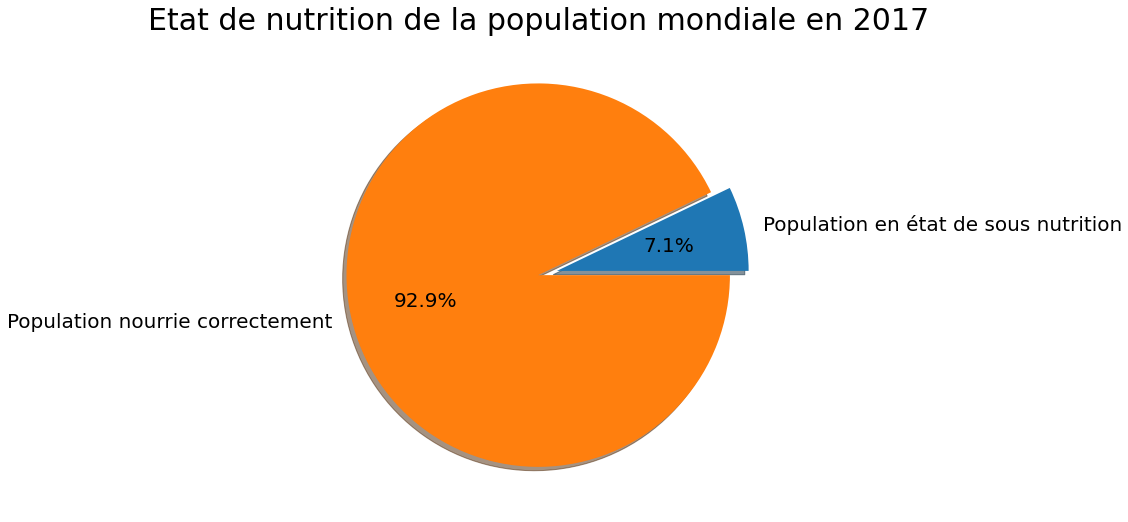

In [4]:
pop_sum = pop_2017['Valeur'].sum()
sous_sum = sous_merge_2017['Valeur_ali'].sum()
sous_prop = (sous_sum/pop_sum)*100

plt.figure(figsize=(15,15))
labels = ["Population en état de sous nutrition", "Population nourrie correctement"]
sizes = [sous_prop, 100-sous_prop]
explode = (0.1,0)
textprops = {"fontsize":20}
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Etat de nutrition de la population mondiale en 2017", fontsize=30)
plt.tight_layout()
plt.savefig("Proportion_nutrition_totale.png", dpi=200, bbox_inches = 'tight')
plt.show()

## Répartition de la sous-nutrition par régions :

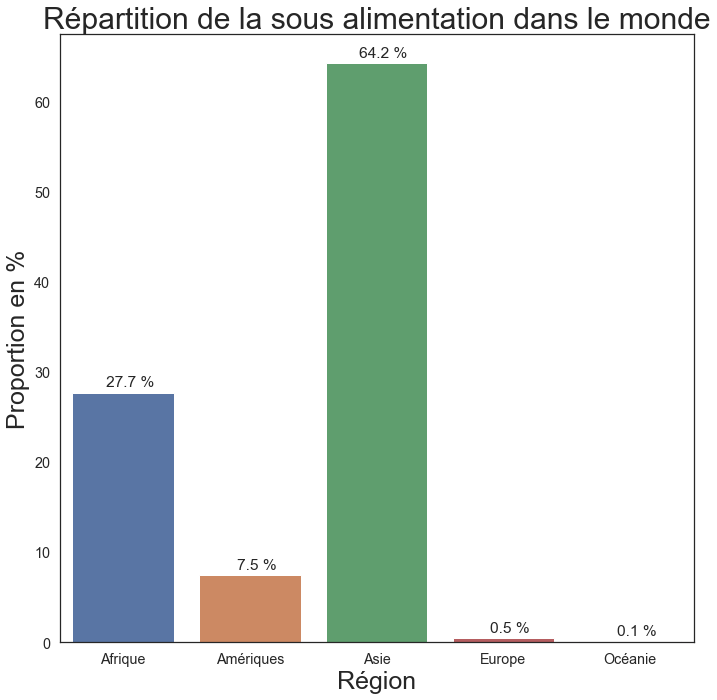

In [5]:
sous_region = sous_merge_2017.groupby(['Region Name']).sum()
sous_region.reset_index(0, inplace=True)
sous_region['Proportion'] = (sous_region['Valeur_ali']/sous_sum)*100

sns.set(style="white", font_scale = 1.3)


plt.figure(figsize=(10,10))
graph = sns.barplot(data=sous_region, x='Region Name', y='Proportion', palette="deep")

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(7, 10), 
                   textcoords='offset points') 
plt.xlabel("Région", fontsize=25)
plt.ylabel("Proportion en %", fontsize=25)
plt.title("Répartition de la sous alimentation dans le monde", fontsize=30)
plt.savefig("Repartition_sousali_2017_region.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Analyse des pays où la sous-nutrition est la plus forte :
    

### En % de la sous-nutrition mondiale :

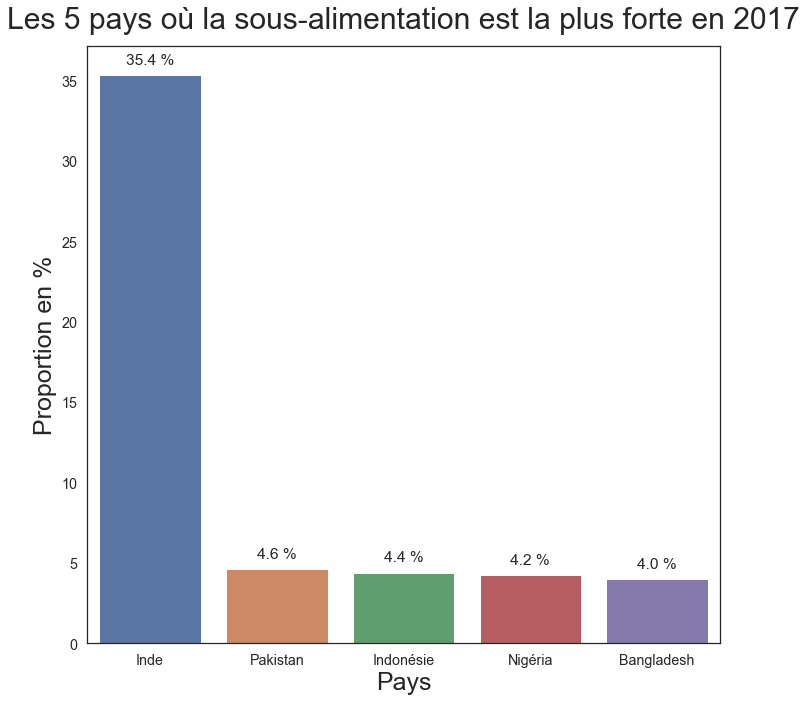

In [6]:
sous_merge_2017['Proportion'] = (sous_merge_2017['Valeur_ali']/sous_sum)*100

plt.figure(figsize=(10,10))
graph = sns.barplot(data=sous_merge_2017.sort_values(by=['Proportion'], ascending=False).head(), x='Zone', y='Proportion')

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Pays", fontsize=25)
plt.ylabel("Proportion en %", fontsize=25)
plt.title("Les 5 pays où la sous-alimentation est la plus forte en 2017", y=1.02, fontsize=30)
plt.savefig("Top_pays_sousali_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

### En % de la population du pays :

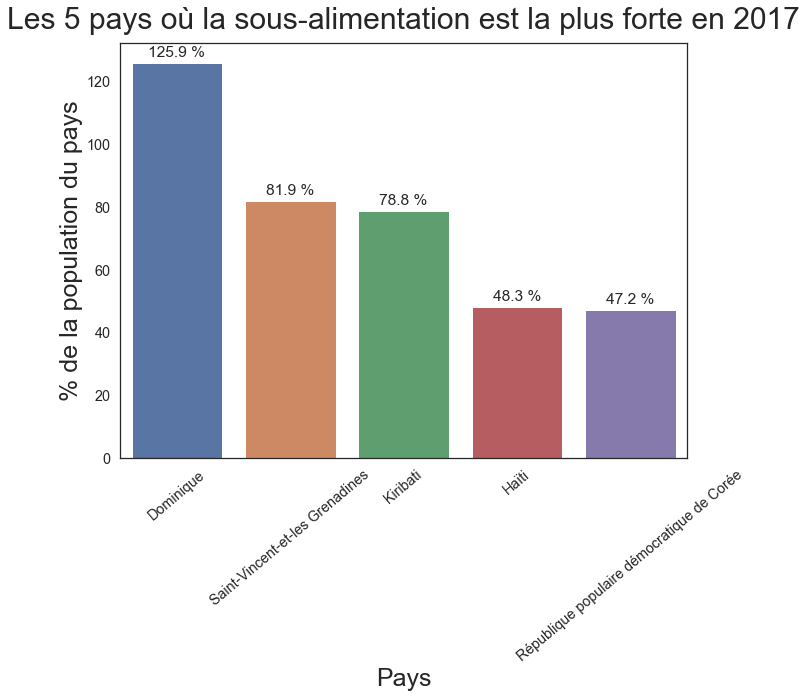

In [7]:
sous_merge_2017['Prop/Pays'] = (sous_merge_2017['Valeur_ali']/sous_merge_2017['Valeur_pop'])*100

plt.figure(figsize=(10,10))
graph = sns.barplot(data=sous_merge_2017.sort_values(by=['Prop/Pays'], ascending=False).head(), x='Zone', y='Prop/Pays')

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points') 
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% de la population du pays", fontsize=25)
plt.title("Les 5 pays où la sous-alimentation est la plus forte en 2017", y=1.02, fontsize=30)
plt.xticks(rotation=40)
plt.savefig("Top_pays_pays_sousali_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

# 3. Etude de la disponibilité en 2013 (données originales avec la population de 2013)

## Préparation des dataframes :

In [8]:
dispo_pays = dispo_df.groupby(['Zone']).sum()
dispo_pays.reset_index(0, inplace=True)


pop_sum = pop_2013['Valeur'].sum()
dispo_total = pd.merge(left=dispo_pays, right=pop_2013, how="left", on="Zone")
dispo_total['Disponibilité/pays'] = (dispo_total['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_total['Valeur'])/2500
dispo = [['Disponibilité totale', (dispo_total['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100]]
dispo = pd.DataFrame(dispo)

dispo_loc = dispo_df.loc[dispo_df['Origine'] == 'vegetale']
dispo_loc = dispo_loc.groupby(["Zone"]).sum()
dispo_loc.reset_index(inplace=True)

dispo_vegetale = pd.merge(left=dispo_loc, right=pop_2013, how="left", on="Zone")
dispo_vegetale['Disponibilité/pays'] = (dispo_vegetale['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetale['Valeur'])/2500
dispo_vege = [["Disponibilité totale d'origine végétale", (dispo_vegetale['Disponibilité/pays'].sum()/pop_sum)*100], ['Population totale', 100]]
dispo_vege = pd.DataFrame(dispo_vege)

dispo_ali = [['Disponibilité totale', (dispo_total['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100],["Disponibilité d'origine végétale", (dispo_vegetale['Disponibilité/pays'].sum()/pop_sum)*100]]
dispo_ali = pd.DataFrame(dispo_ali)

dispo_ali_nbr = [["Disponibilité totale", dispo_total['Disponibilité/pays'].sum()], ["Population totale", pop_sum], ["Disponibilité d'origine végétale", dispo_vegetale['Disponibilité/pays'].sum()]]
dispo_ali_nbr = pd.DataFrame(dispo_ali_nbr)

## Disponibilité totale par rapport à la population mondiale :

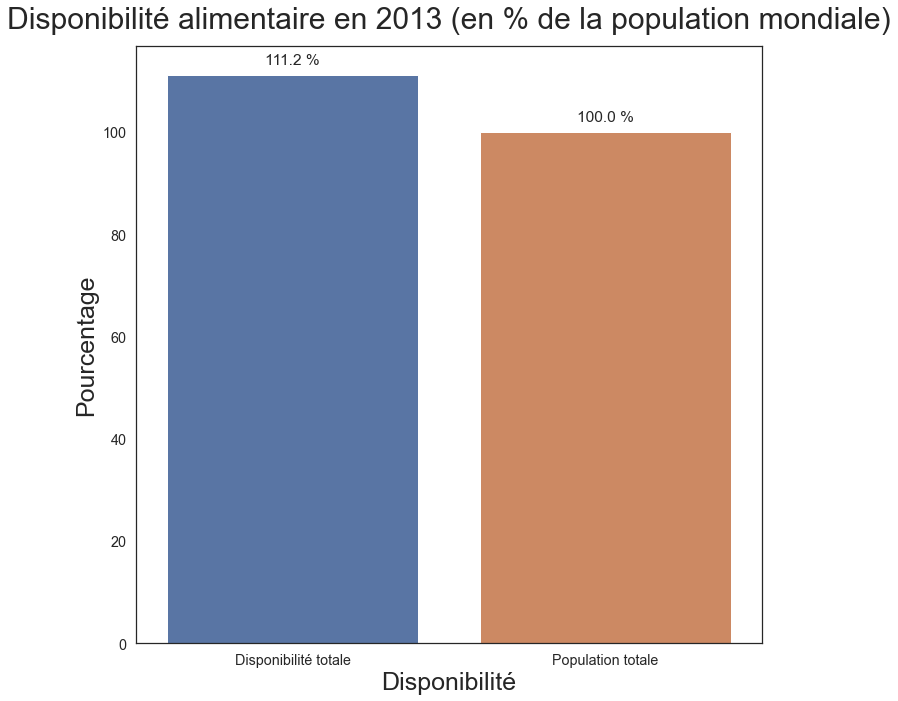

In [9]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points')
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire en 2013 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité des produits d'origine végétale par rapport à la population mondiale :

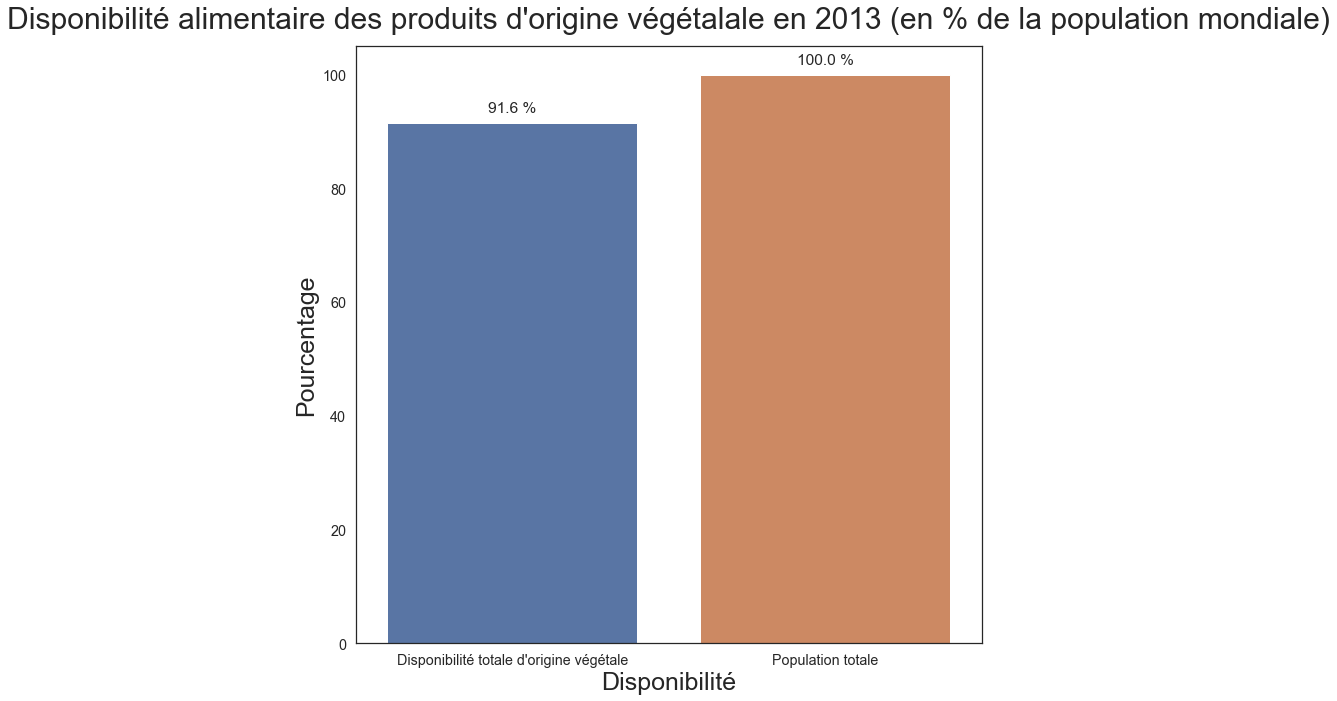

In [10]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_vege, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire des produits d'origine végétalale en 2013 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale_vege_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité alimentaire totale et végétale  :

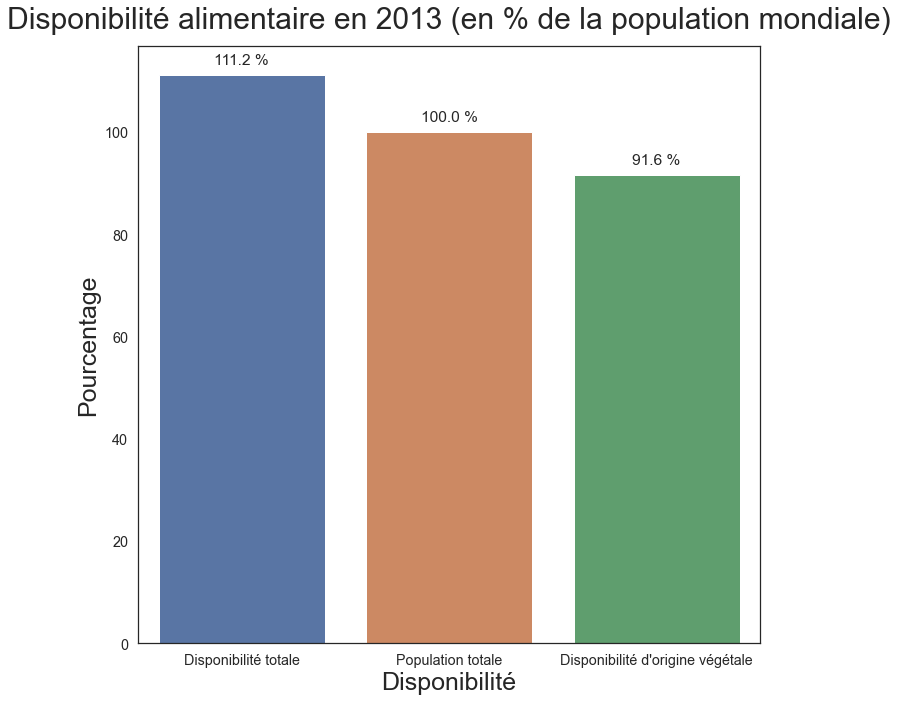

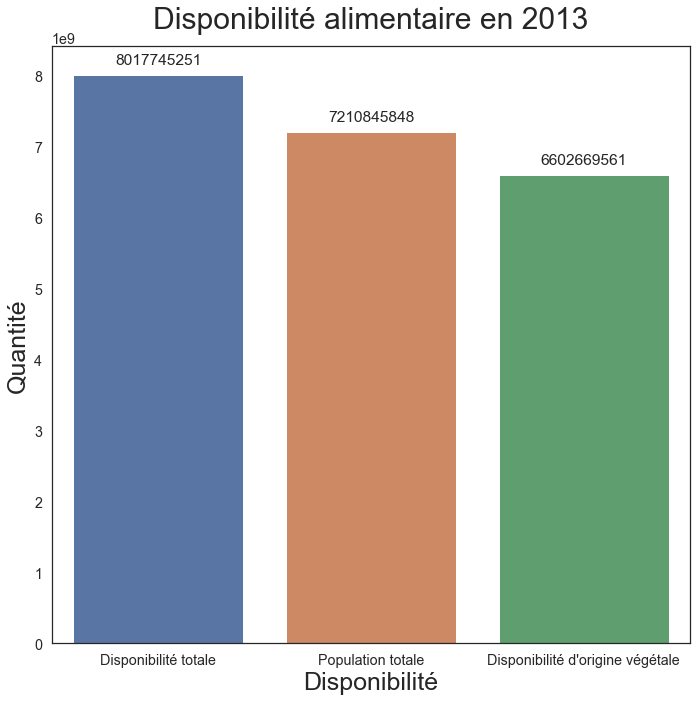

In [11]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire en 2013 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("Dispo_ali_2013_pourcentage.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali_nbr, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Quantité", fontsize=25)
plt.title("Disponibilité alimentaire en 2013", y=1.02, fontsize=30)
plt.savefig("dispo_ali_2013_nbr.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Etude de la répartition de la disponibilité intérieure en 2013 :

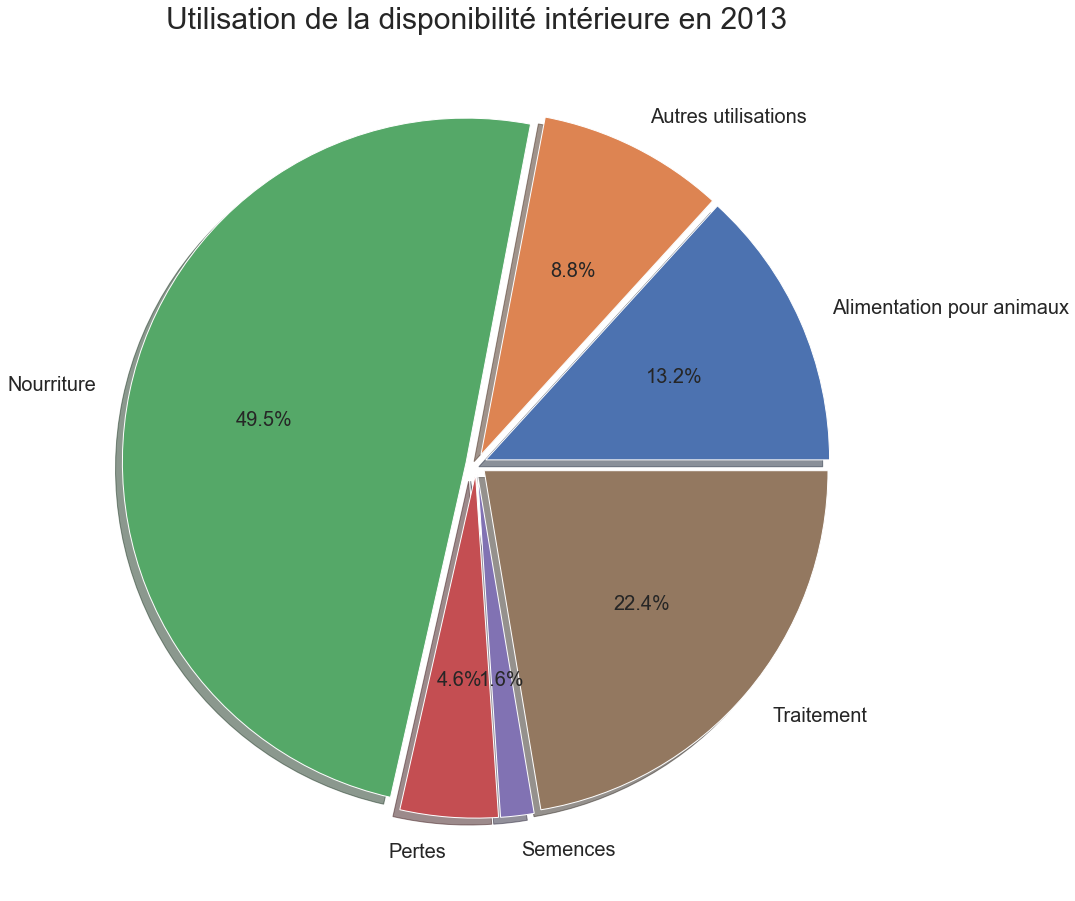

In [12]:
plt.figure(figsize=(15,15))
labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes= [(dispo_df['Aliments pour animaux'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Autres Utilisations'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Nourriture'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Pertes'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Semences'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Traitement'].sum()/dispo_df['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation de la disponibilité intérieure en 2013", fontsize=30)
plt.savefig("dispo_int_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Etude de la disponibilité par habitant en 2013 :

### Préparation des dataframes :

In [13]:
sous_merge_2013 = pd.merge(left=sous_2013, right=pop_2013, how="left", on="Zone")
sous_merge_2013.rename(columns={'Valeur_x':'Valeur_ali', 'Valeur_y':'Valeur_pop'}, inplace=True)
sous_merge_2013.drop(["Année_x", "Année_y"], axis=1, inplace=True)
dispo_zone = pd.merge(left=dispo_pays, right=sous_merge_2013, how="left", on="Zone")

dispo_zone['Disponibilité/habitant'] = dispo_zone['Disponibilité intérieure']/dispo_zone['Valeur_pop']
dispo_sum = dispo_zone['Disponibilité/habitant'].sum()
dispo_zone['Dispo_proportion'] = (dispo_zone['Disponibilité/habitant']/dispo_sum)*100

dispo_ali_sum = dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_zone['Prop/personne'] = (dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)']/dispo_ali_sum)*100

### Par rapport à la disponibilité intérieure :

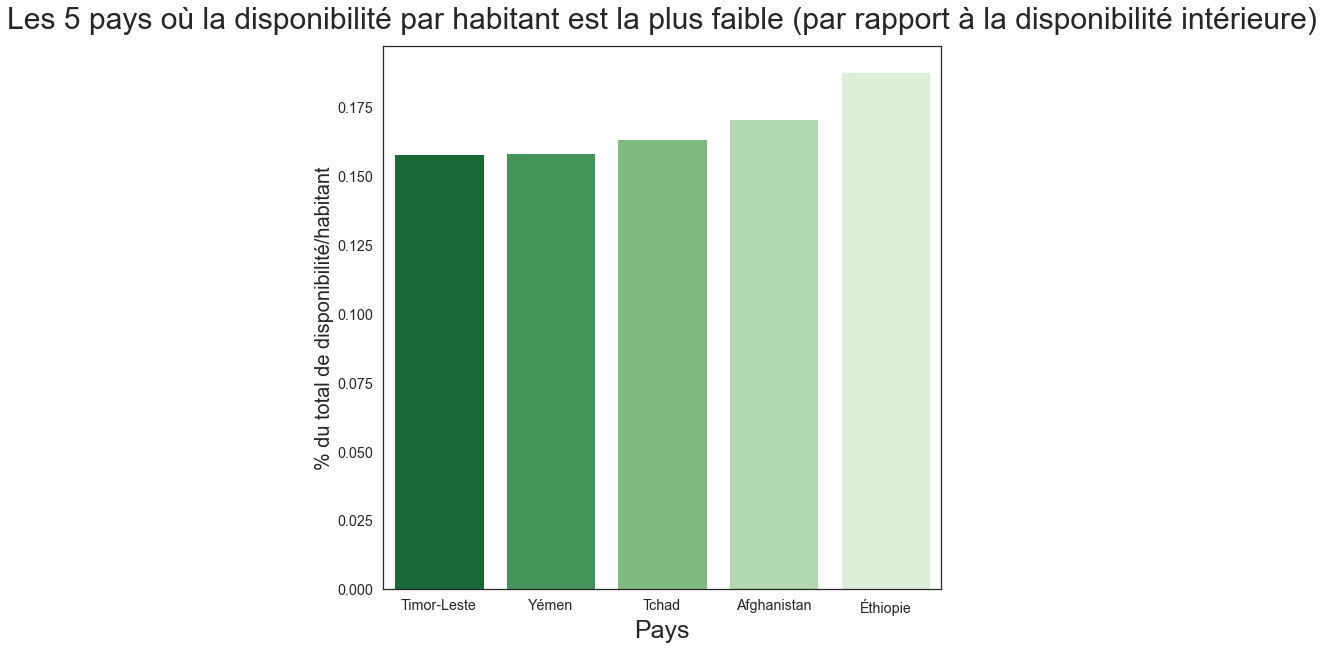

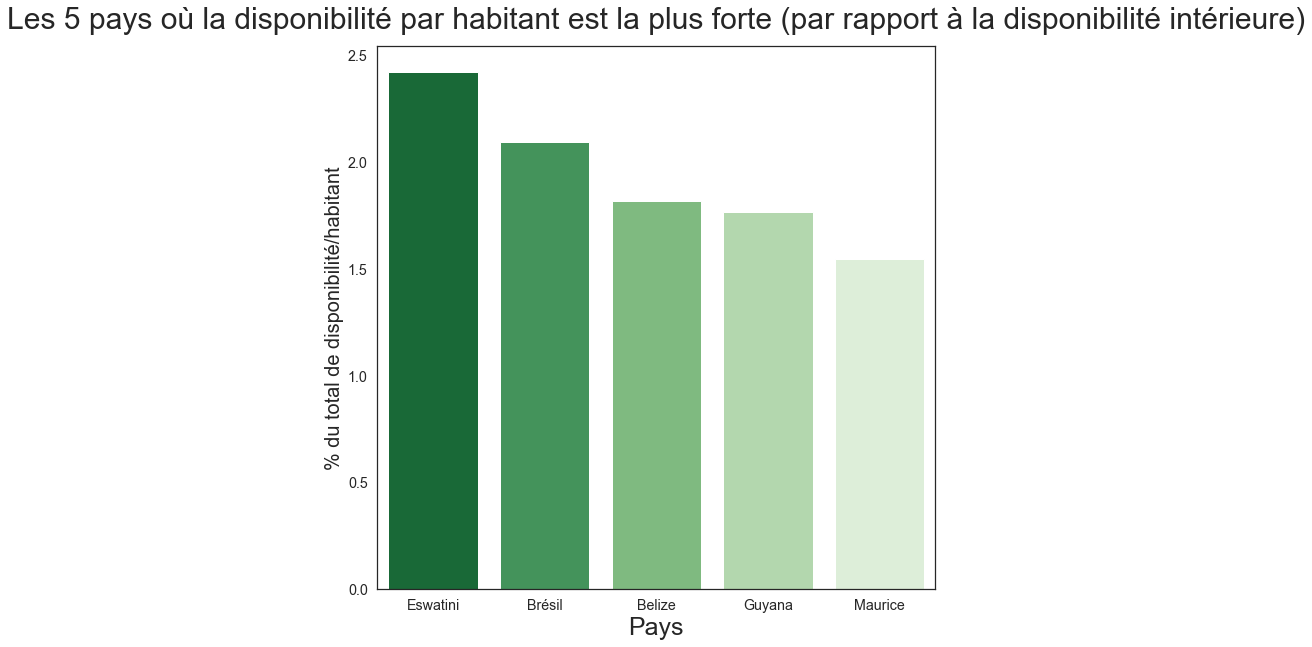

In [14]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Dispo_proportion"], ascending=True).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible (par rapport à la disponibilité intérieure)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_faible_2013.png", dpi=200, bbox_inches = 'tight')

plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Dispo_proportion"], ascending=False).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte (par rapport à la disponibilité intérieure)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_forte_2013.png", dpi=200, bbox_inches = 'tight')

### Par rapport à la disponibilité alimentaire :

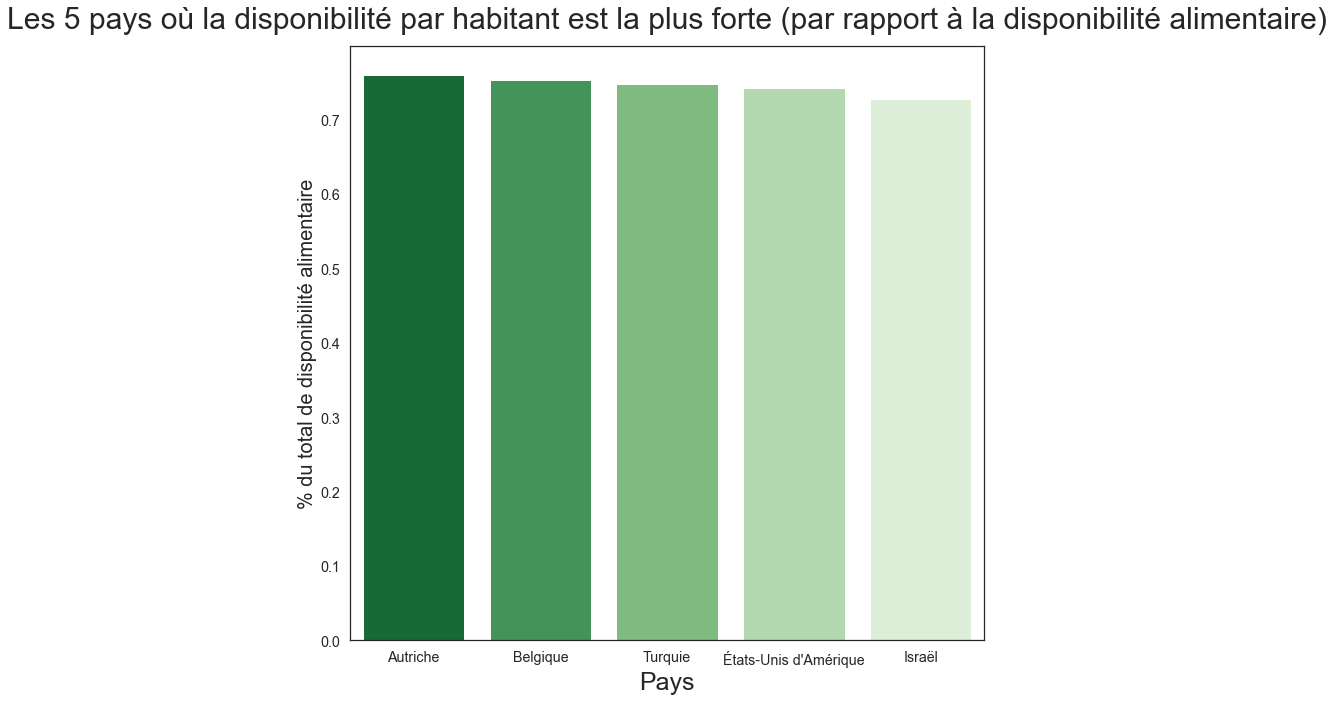

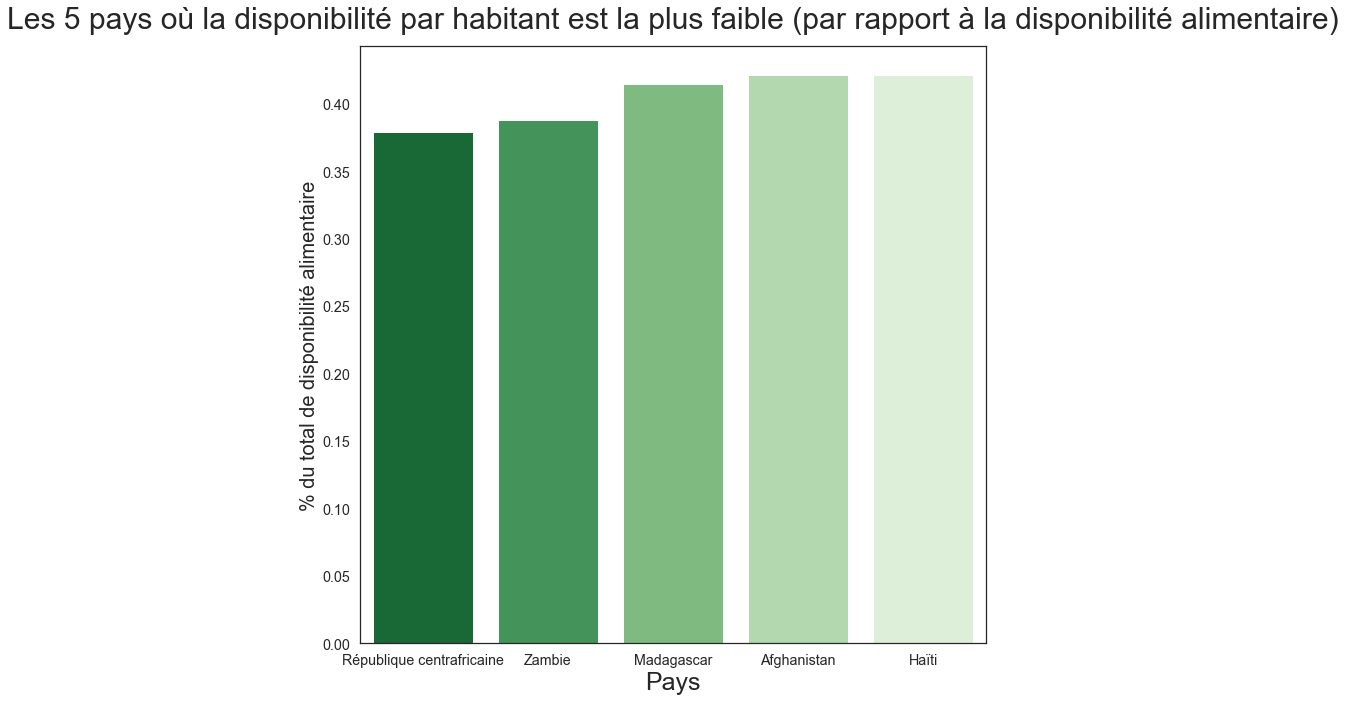

In [15]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Prop/personne"], ascending=False).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte (par rapport à la disponibilité alimentaire)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_forte_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Prop/personne"], ascending=True).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible (par rapport à la disponibilité alimentaire)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_faible_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

# 4. Etude de la disponibilité en 2013 (données originales avec la population de 2017)

## Préparation des dataframes

In [16]:
dispo_pays = dispo_df.groupby(['Zone']).sum()
dispo_pays.reset_index(0, inplace=True)

pop_sum = pop_2017['Valeur'].sum()
dispo_total = pd.merge(left=dispo_pays, right=pop_2017, how="left", on="Zone")
dispo_total['Disponibilité/pays'] = (dispo_total['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_total['Valeur'])/2500
dispo = [['Disponibilité totale', (dispo_total['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100]]
dispo = pd.DataFrame(dispo)

dispo_loc = dispo_df.loc[dispo_df['Origine'] == 'vegetale']
dispo_loc = dispo_loc.groupby(["Zone"]).sum()
dispo_loc.reset_index(inplace=True)

dispo_vegetale = pd.merge(left=dispo_loc, right=pop_2017, how="left", on="Zone")
dispo_vegetale['Disponibilité/pays'] = (dispo_vegetale['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetale['Valeur'])/2500
dispo_vege = [["Disponibilité totale d'origine végétale", (dispo_vegetale['Disponibilité/pays'].sum()/pop_sum)*100], ['Population totale', 100]]
dispo_vege = pd.DataFrame(dispo_vege)

dispo_ali = [['Disponibilité totale', (dispo_total['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100],["Disponibilité d'origine végétale", (dispo_vegetale['Disponibilité/pays'].sum()/pop_sum)*100]]
dispo_ali = pd.DataFrame(dispo_ali)

dispo_ali_nbr = [["Disponibilité totale", dispo_total['Disponibilité/pays'].sum()], ["Population totale", pop_sum], ["Disponibilité d'origine végétale", dispo_vegetale['Disponibilité/pays'].sum()]]
dispo_ali_nbr = pd.DataFrame(dispo_ali_nbr)

## Disponibilité totale par rapport à la population mondiale :

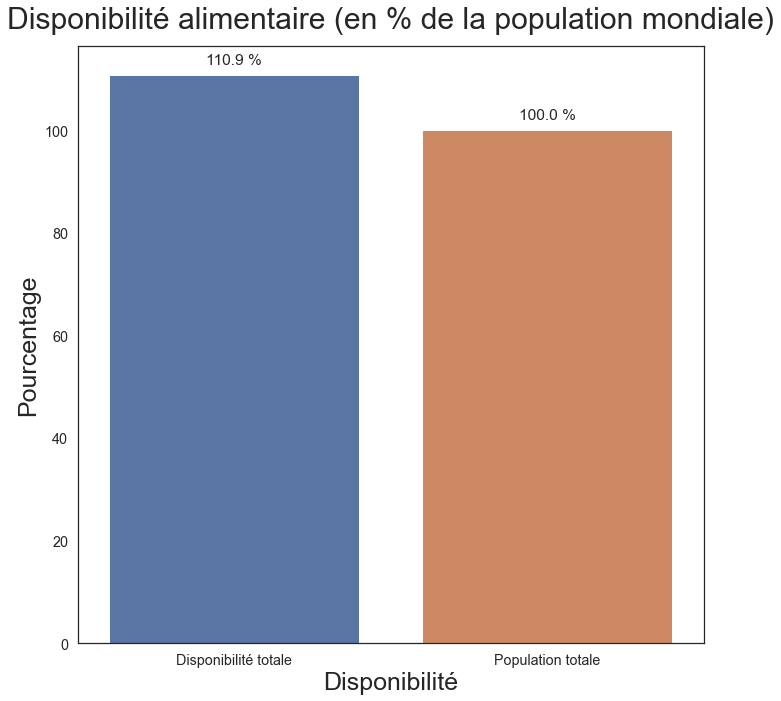

In [17]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité des produits d'origine végétale par rapport à la population mondiale :

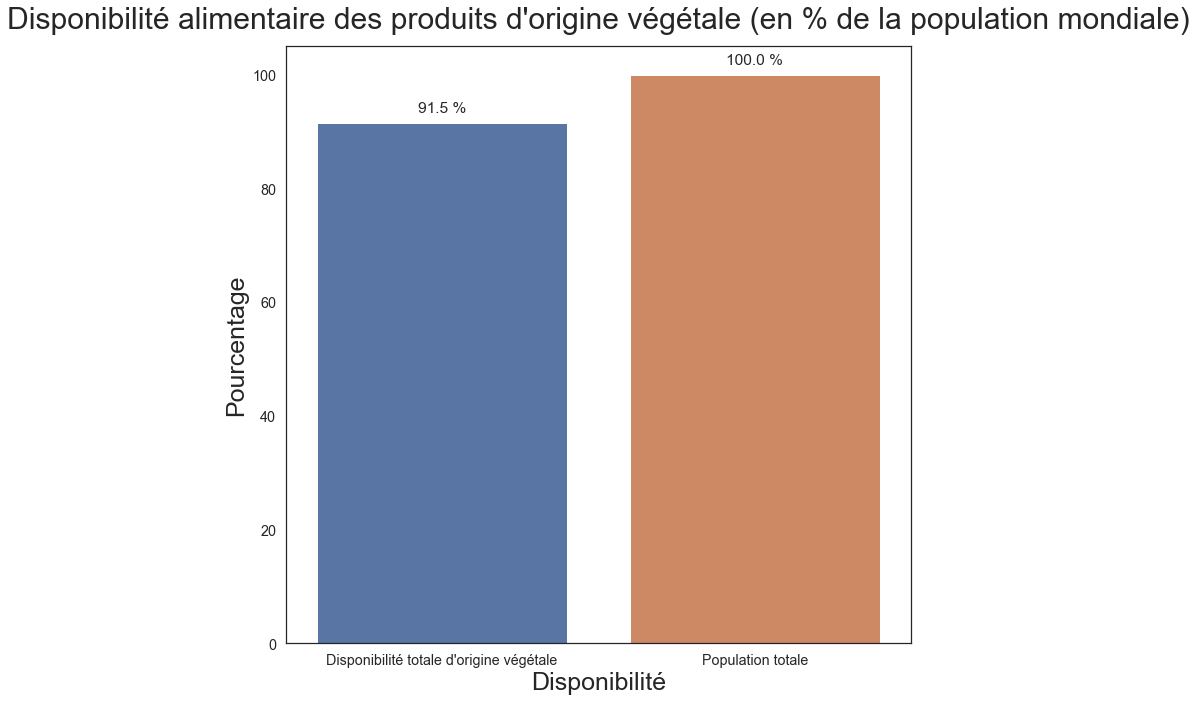

In [18]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_vege, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire des produits d'origine végétale (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale_vege.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité alimentataire totale et végétale :

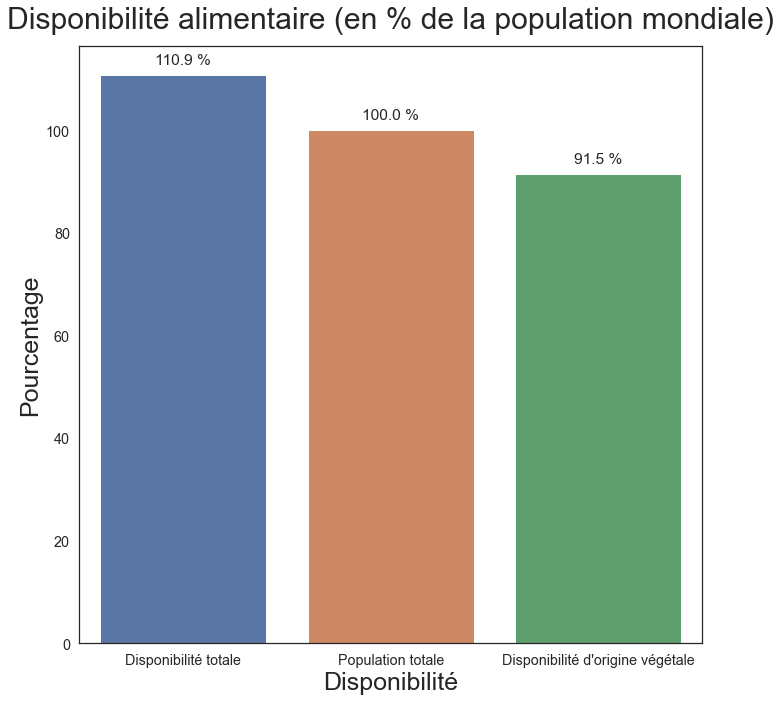

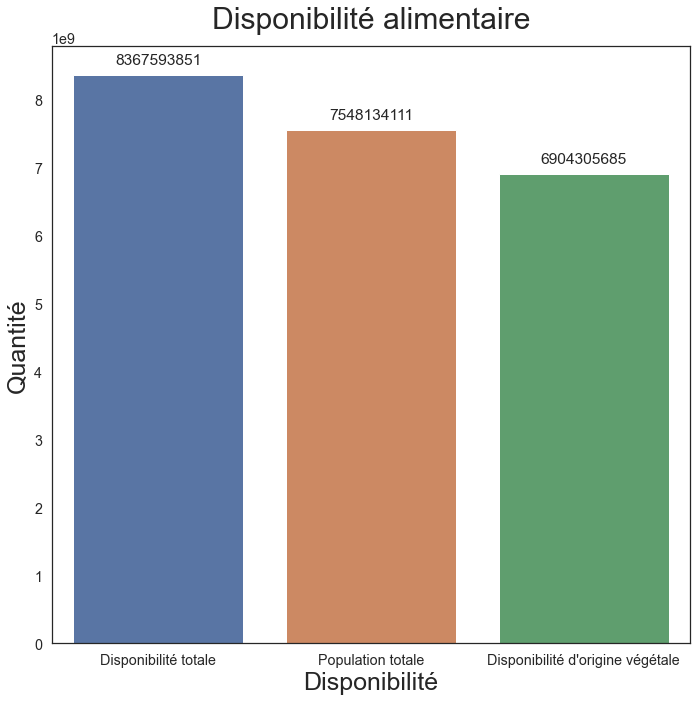

In [19]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 

plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("Dispo_ali_pourcentage.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali_nbr, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 

plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Quantité", fontsize=25)
plt.title("Disponibilité alimentaire", y=1.02, fontsize=30)
plt.savefig("Dispo_ali_nbr.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Etude de la répartition de la disponibilité intérieure :

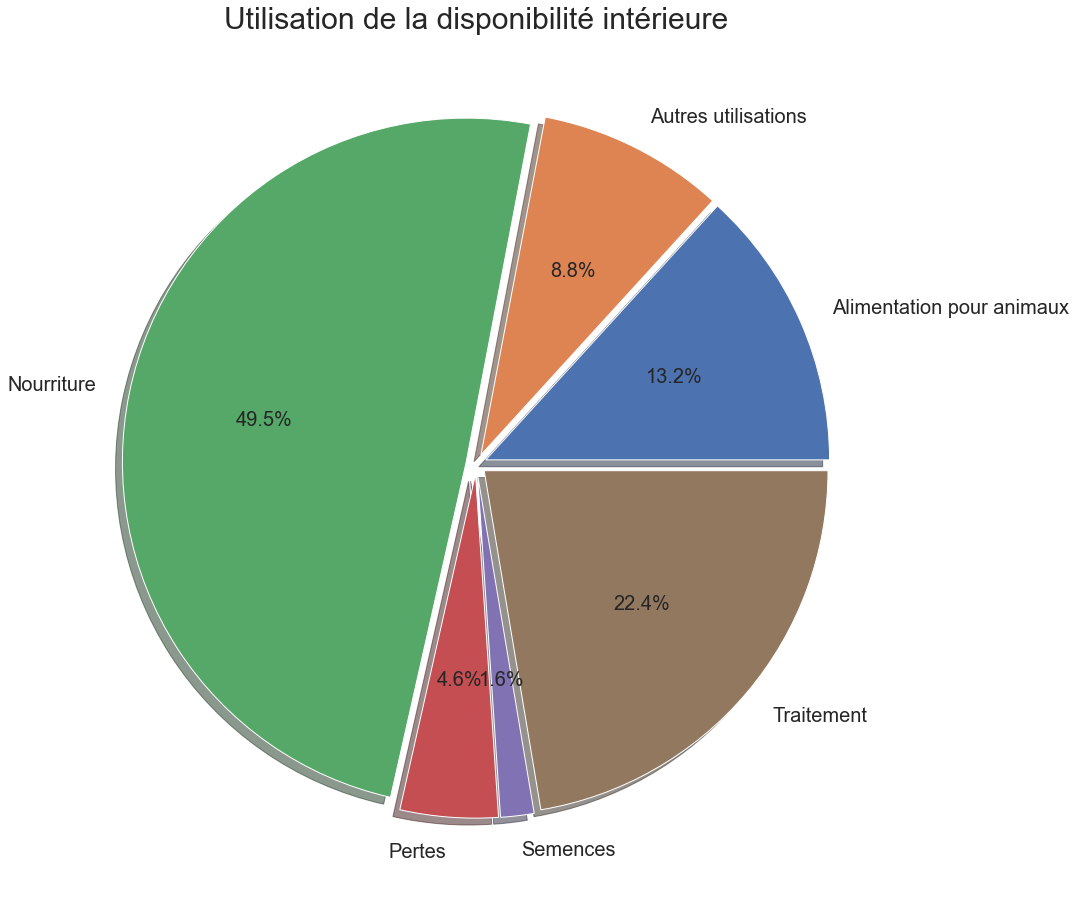

In [20]:
plt.figure(figsize=(15,15))
labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes= [(dispo_df['Aliments pour animaux'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Autres Utilisations'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Nourriture'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Pertes'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Semences'].sum()/dispo_df['Disponibilité intérieure'].sum())*100, 
        (dispo_df['Traitement'].sum()/dispo_df['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation de la disponibilité intérieure", fontsize=30)
plt.savefig("dispo_int.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Etude de la disponibilité par habitant :

### Préparation des dataframes :

In [21]:
sous_merge_2013 = pd.merge(left=sous_2017, right=pop_2017, how="left", on="Zone")
sous_merge_2013.rename(columns={'Valeur_x':'Valeur_ali', 'Valeur_y':'Valeur_pop'}, inplace=True)
sous_merge_2013.drop(["Année_x", "Année_y"], axis=1, inplace=True)
dispo_zone = pd.merge(left=dispo_pays, right=sous_merge_2013, how="left", on="Zone")

dispo_zone['Disponibilité/habitant'] = dispo_zone['Disponibilité intérieure']/dispo_zone['Valeur_pop']
dispo_sum = dispo_zone['Disponibilité/habitant'].sum()
dispo_zone['Dispo_proportion'] = (dispo_zone['Disponibilité/habitant']/dispo_sum)*100

dispo_ali_sum = dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_zone['Prop/personne'] = (dispo_zone['Disponibilité alimentaire (Kcal/personne/jour)']/dispo_ali_sum)*100

### Par rapport à la disponibilité intérieure :

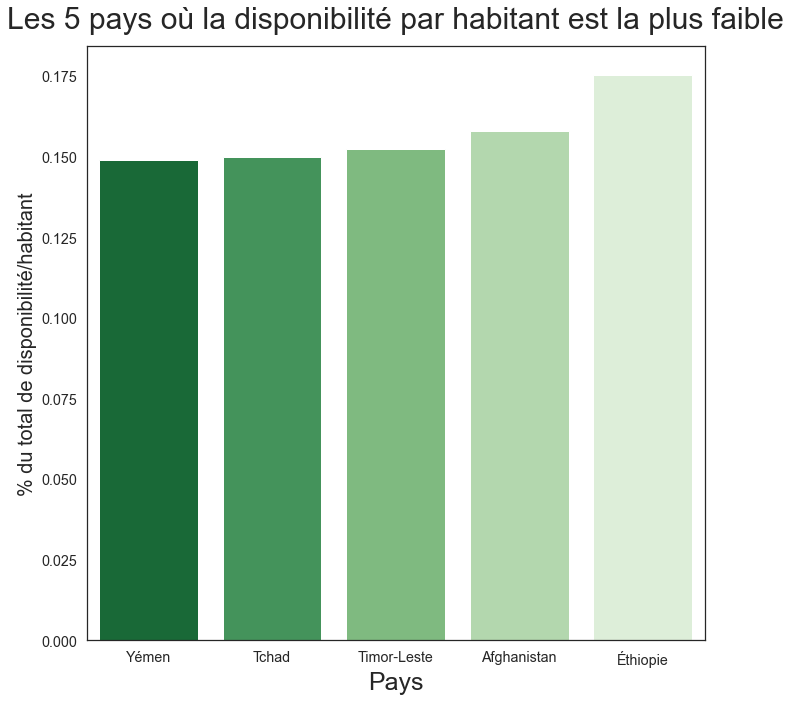

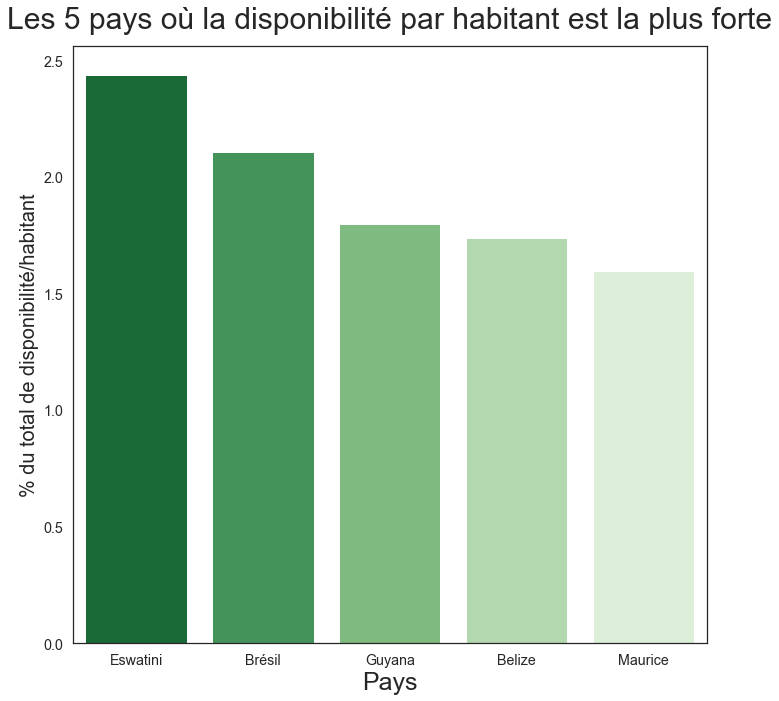

In [22]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Dispo_proportion"], ascending=True).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_faible.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Dispo_proportion"], ascending=False).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_forte.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

### Par rapport à la disponibilité alimentaire :

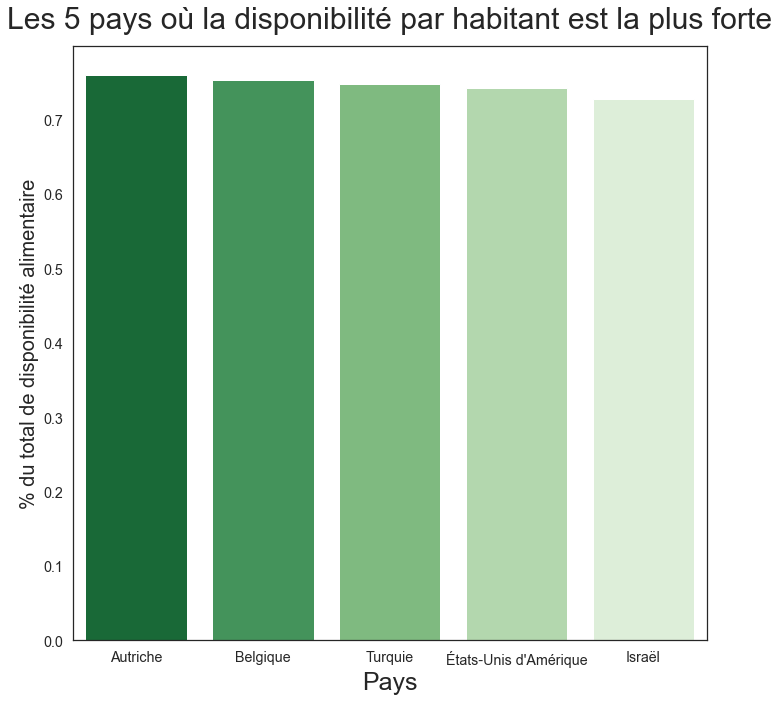

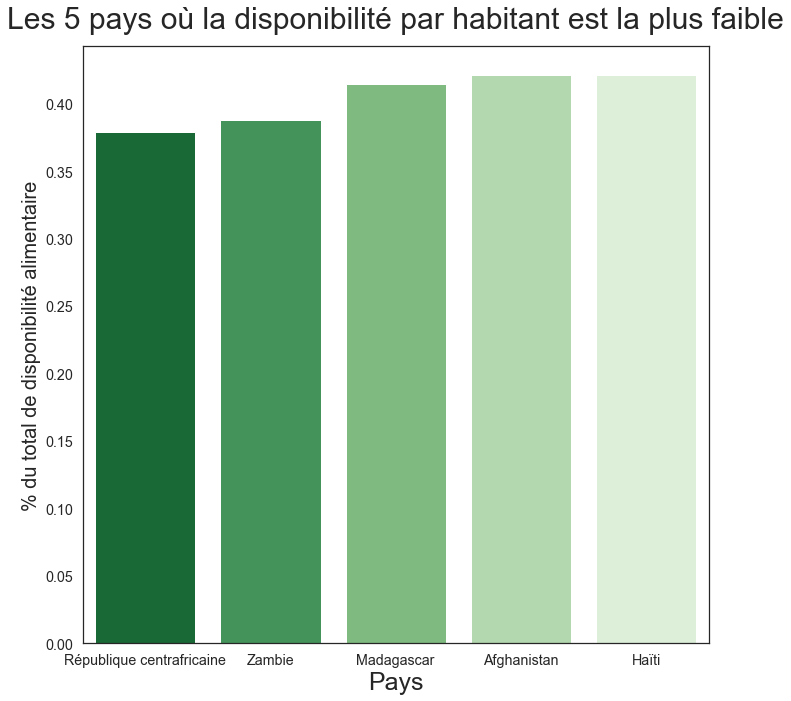

In [23]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Prop/personne"], ascending=False).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_forte.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone.sort_values(by=["Prop/personne"], ascending=True).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_faible.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

# 5. Etude de la disponibilité en 2017 (données récupérées sur le site de la FAO)

## Préparation des dataframes :

In [24]:
dispo_2017_use = dispo_2017.drop(["Code Domaine", "Domaine", "Code zone (FAO)", "Code Élément", "Code Produit", "Code année", "Année", "Unité", "Symbole", "Description du Symbole"], axis=1)
dispo_2017_use = dispo_2017_use.pivot(index=["Zone", "Produit"], columns="Élément", values="Valeur").reset_index()

dispo_2017_vege = dispo_2017_vege[['Produit']]
dispo_2017_vege = dispo_2017_vege.groupby(['Produit']).sum().reset_index()
vege_list = dispo_2017_vege['Produit'].tolist()

dispo_2017_use["Origine"] = np.where(dispo_2017_use["Produit"].isin(vege_list), "vegetale", "animale")


dispo_pays_2017 = dispo_2017_use.groupby(['Zone']).sum()
dispo_pays_2017.reset_index(0, inplace=True)


pop_sum = pop_2017['Valeur'].sum()
dispo_total_2017 = pd.merge(left=dispo_pays_2017, right=pop_2017, how="left", on="Zone")
dispo_total_2017['Disponibilité/pays'] = (dispo_total_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_total_2017['Valeur'])/2500
dispo_2017 = [['Disponibilité totale', (dispo_total_2017['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100]]
dispo_2017 = pd.DataFrame(dispo)

dispo_loc_2017 = dispo_2017_use.loc[dispo_2017_use['Origine'] == 'vegetale']
dispo_loc_2017 = dispo_loc_2017.groupby(["Zone"]).sum()
dispo_loc_2017.reset_index(inplace=True)

dispo_vegetale_2017 = pd.merge(left=dispo_loc_2017, right=pop_2017, how="left", on="Zone")
dispo_vegetale_2017['Disponibilité/pays'] = (dispo_vegetale_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_vegetale_2017['Valeur'])/2500
dispo_vege_2017 = [["Disponibilité totale d'origine végétale", (dispo_vegetale_2017['Disponibilité/pays'].sum()/pop_sum)*100], ['Population totale', 100]]
dispo_vege_2017 = pd.DataFrame(dispo_vege_2017)

dispo_ali_2017 = [['Disponibilité totale', (dispo_total_2017['Disponibilité/pays'].sum()/pop_sum)*100],['Population totale', 100],["Disponibilité d'origine végétale", (dispo_vegetale_2017['Disponibilité/pays'].sum()/pop_sum)*100]]
dispo_ali_2017 = pd.DataFrame(dispo_ali_2017)

dispo_ali_2017_nbr = [["Disponibilité totale", dispo_total_2017['Disponibilité/pays'].sum()], ["Population totale", pop_sum], ["Disponibilité d'origine végétale", dispo_vegetale_2017['Disponibilité/pays'].sum()]]
dispo_ali_2017_nbr = pd.DataFrame(dispo_ali_2017_nbr)

## Disponibilité totale par rapport à la population mondiale :

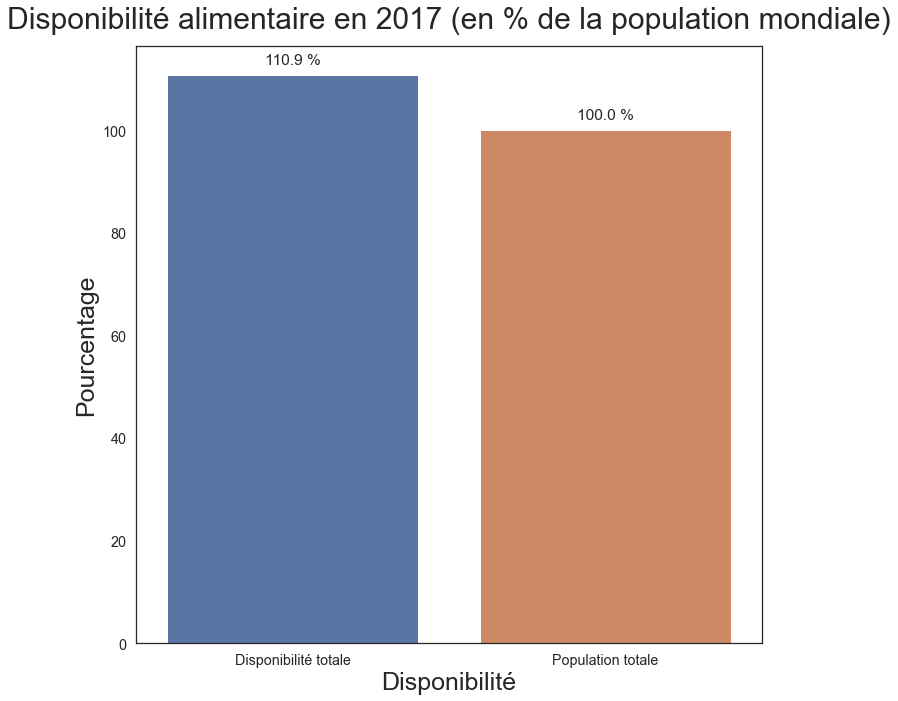

In [25]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_2017, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire en 2017 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité des produits d'origine végétale par rapport à la population mondiale :

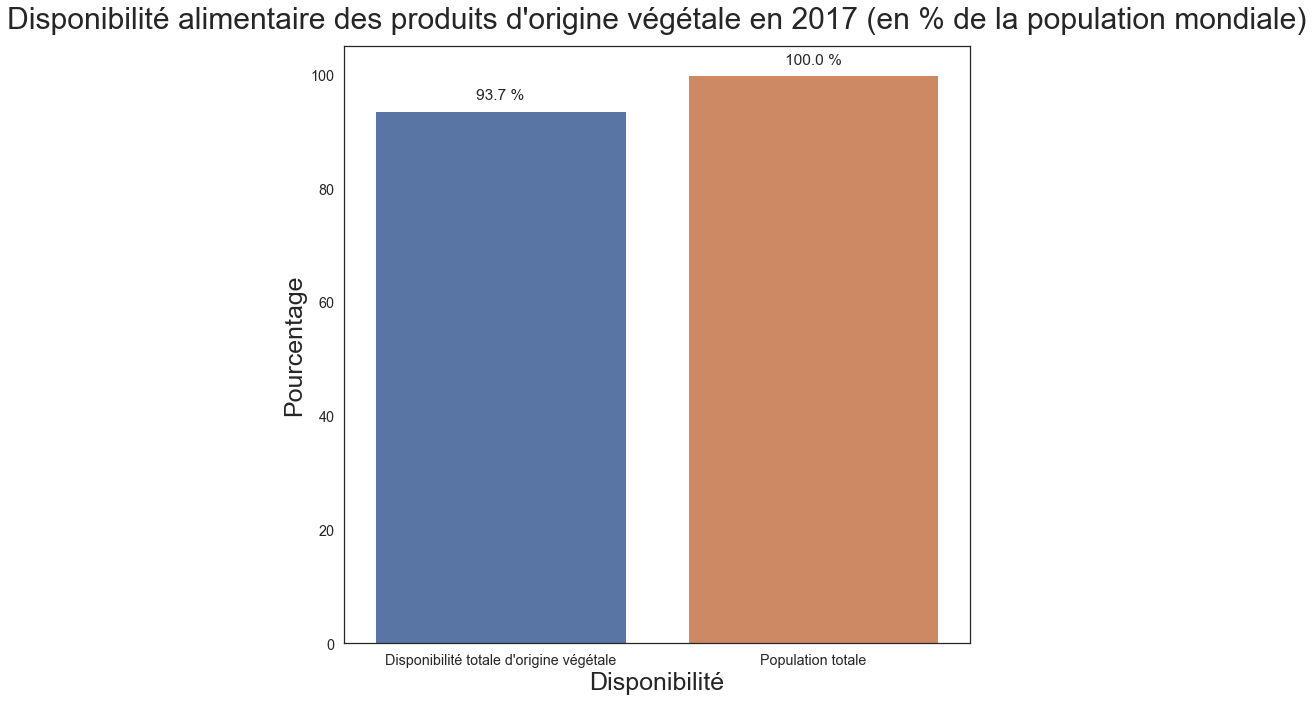

In [26]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_vege_2017, x=0, y=1)
for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire des produits d'origine végétale en 2017 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("dispo_totale_vege_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Disponibilité alimentaire totale et végétale :

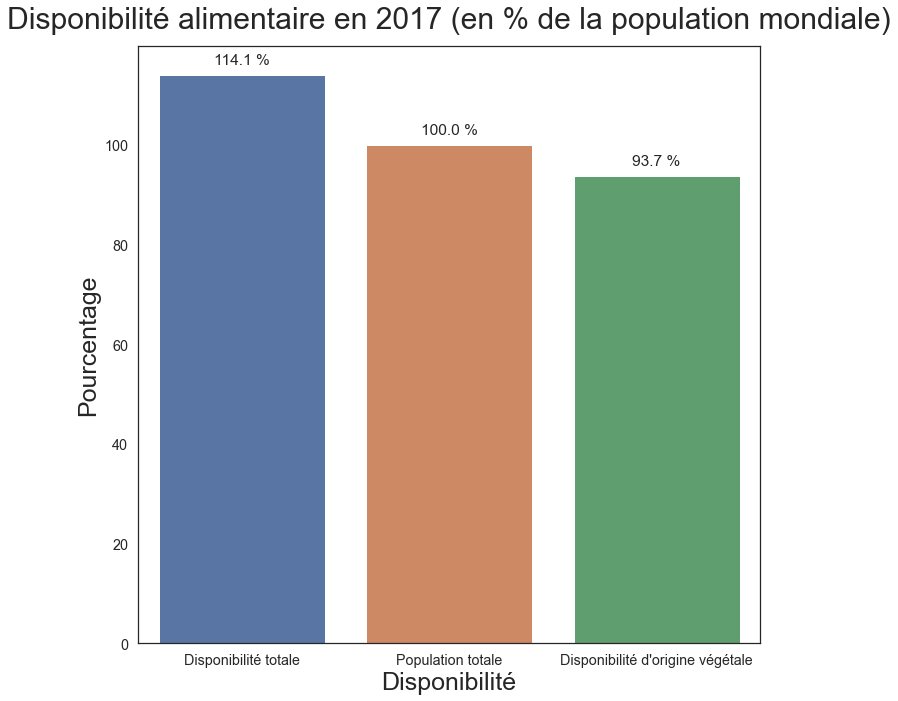

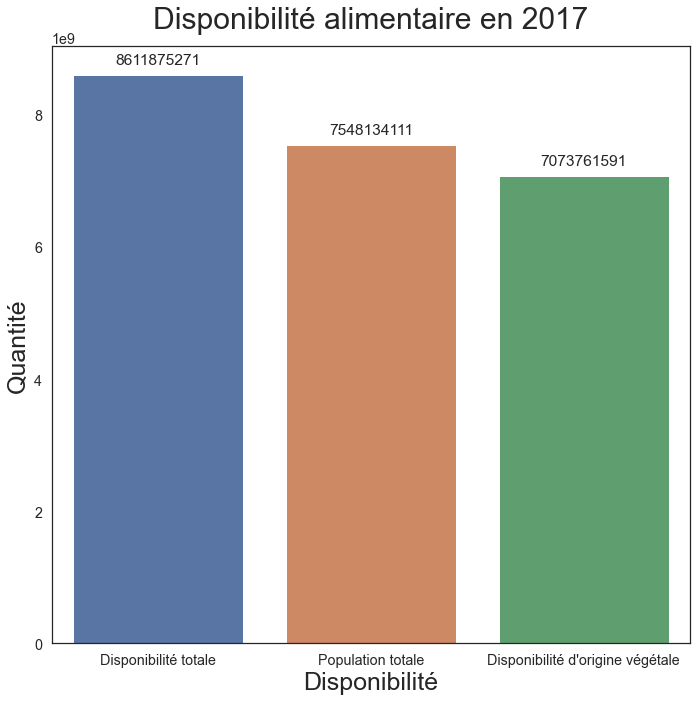

In [27]:
plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali_2017, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 

plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Disponibilité alimentaire en 2017 (en % de la population mondiale)", y=1.02, fontsize=30)
plt.savefig("Dispo_ali_2017_pourcentage.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_ali_2017_nbr, x=0, y=1)

for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 

plt.xlabel("Disponibilité", fontsize=25)
plt.ylabel("Quantité", fontsize=25)
plt.title("Disponibilité alimentaire en 2017", y=1.02, fontsize=30)
plt.savefig("Dispo_ali_2017_nbr.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Etude de la répartition de la disponibilité intérieure en 2017 :

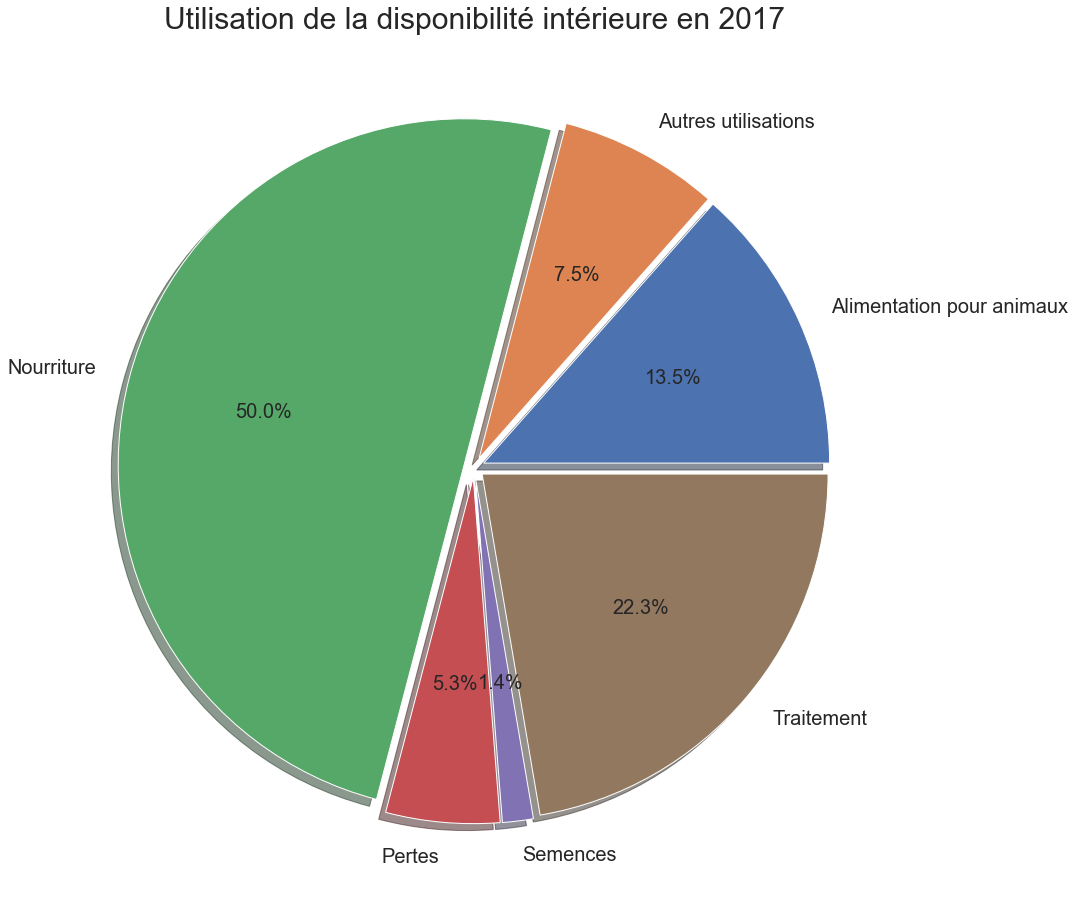

In [28]:
plt.figure(figsize=(15,15))
labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes= [(dispo_2017_use['Aliments pour animaux'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_use['Autres utilisations (non alimentaire)'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_use['Nourriture'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_use['Pertes'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_use['Semences'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_use['Traitement'].sum()/dispo_2017_use['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation de la disponibilité intérieure en 2017", fontsize=30)
plt.savefig("dispo_int_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Etude de la disponibilité par habitant en 2017 :

### Préparation des dataframes :

In [29]:
sous_merge_2017 = pd.merge(left=sous_2017, right=pop_2017, how="left", on="Zone")
sous_merge_2017.rename(columns={'Valeur_x':'Valeur_ali', 'Valeur_y':'Valeur_pop'}, inplace=True)
sous_merge_2017.drop(["Année_x", "Année_y"], axis=1, inplace=True)

dispo_zone_2017 = pd.merge(left=dispo_pays_2017, right=sous_merge_2017, how="left", on="Zone")

dispo_zone_2017['Disponibilité/habitant'] = dispo_zone_2017['Disponibilité intérieure']/dispo_zone_2017['Valeur_pop']
dispo_sum_2017 = dispo_zone_2017['Disponibilité/habitant'].sum()
dispo_zone_2017['Dispo_proportion'] = (dispo_zone_2017['Disponibilité/habitant']/dispo_sum)*100

dispo_ali_2017_sum = dispo_zone_2017['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_zone_2017['Prop/personne'] = (dispo_zone_2017['Disponibilité alimentaire (Kcal/personne/jour)']/dispo_ali_2017_sum)*100

### Par rapport à la disponibilité intérieure :

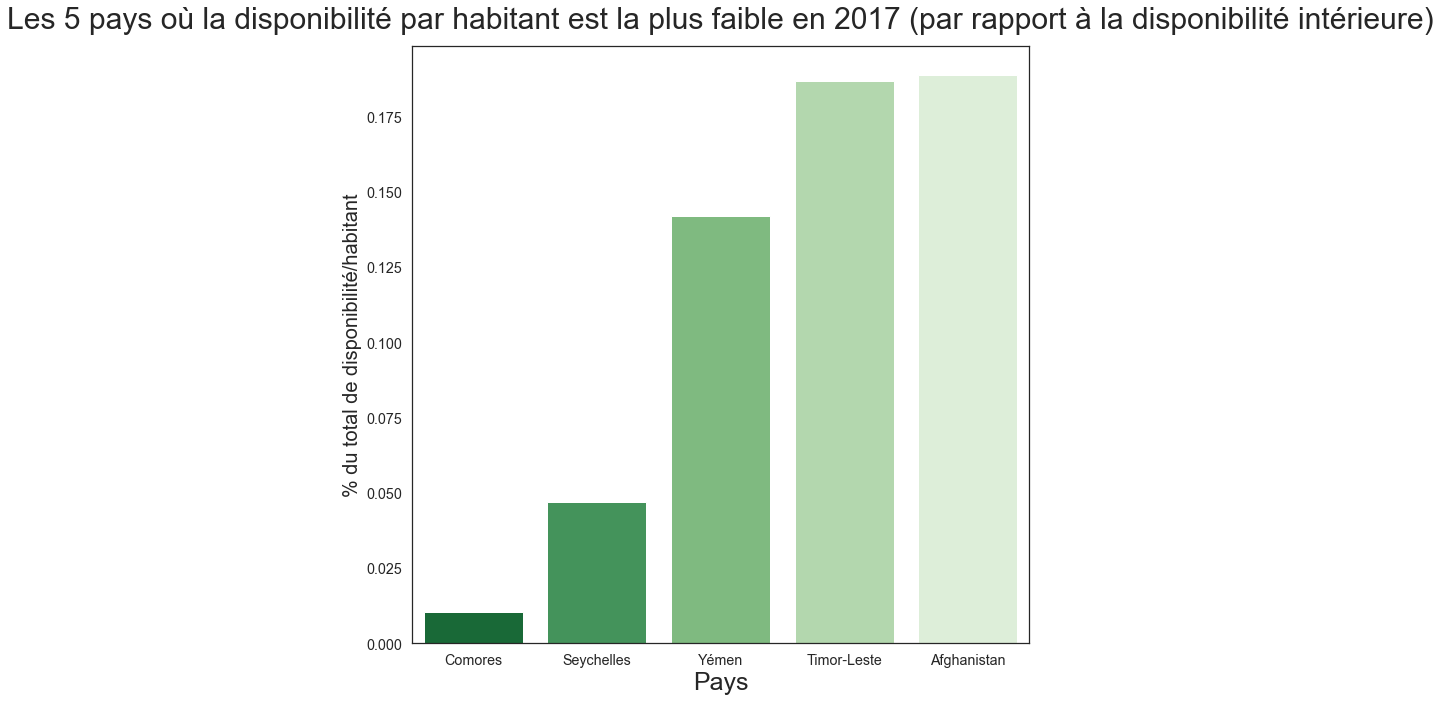

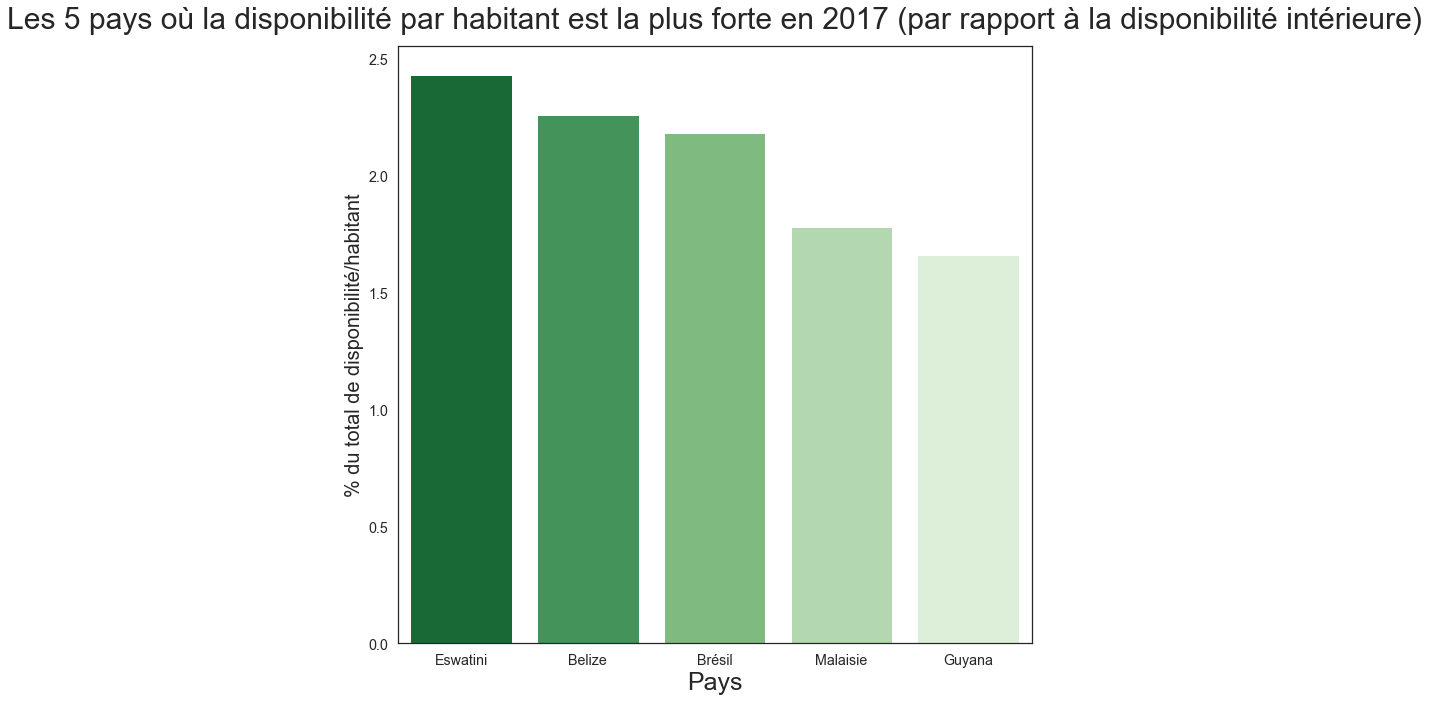

In [30]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone_2017.sort_values(by=["Dispo_proportion"], ascending=True).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible en 2017 (par rapport à la disponibilité intérieure)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_faible_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()


plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone_2017.sort_values(by=["Dispo_proportion"], ascending=False).head(), x="Zone", y="Dispo_proportion", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité/habitant", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte en 2017 (par rapport à la disponibilité intérieure)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_forte_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

### Par rapport à la disponibilité alimentaire :

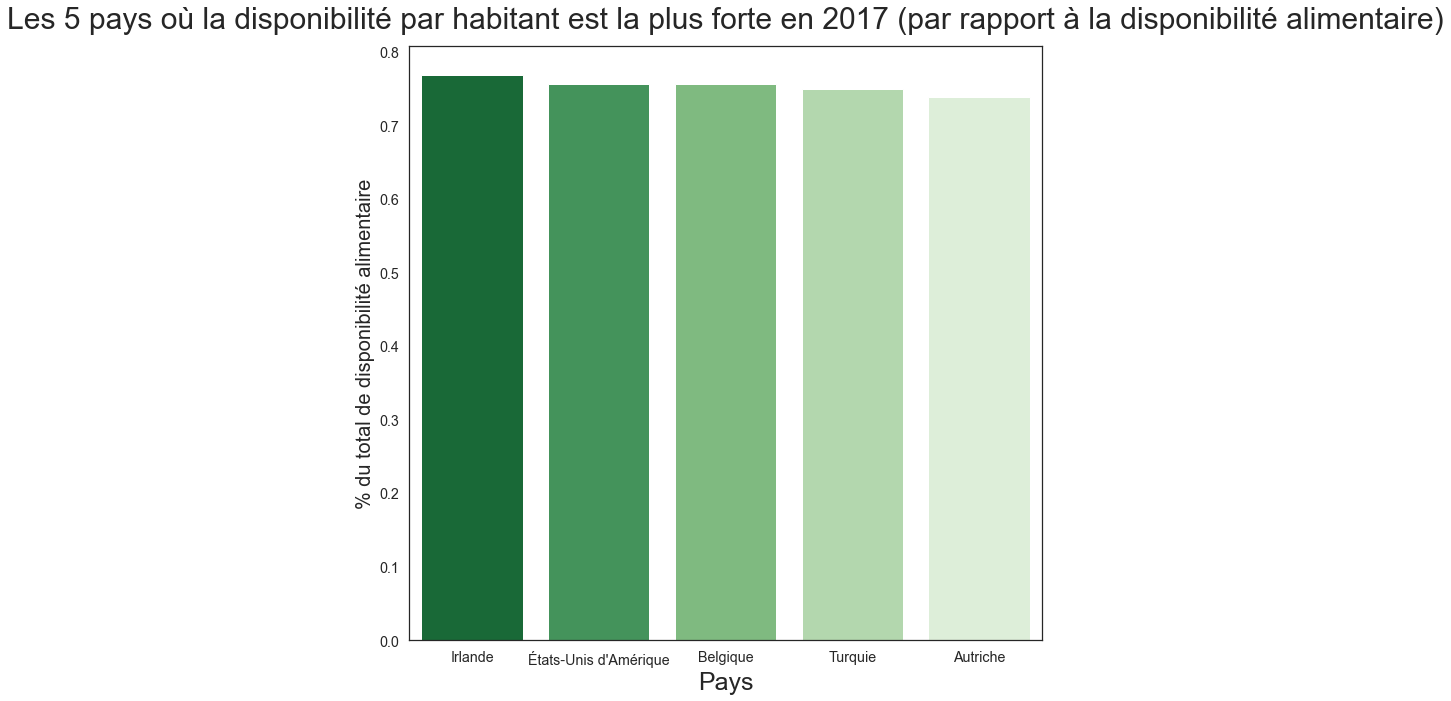

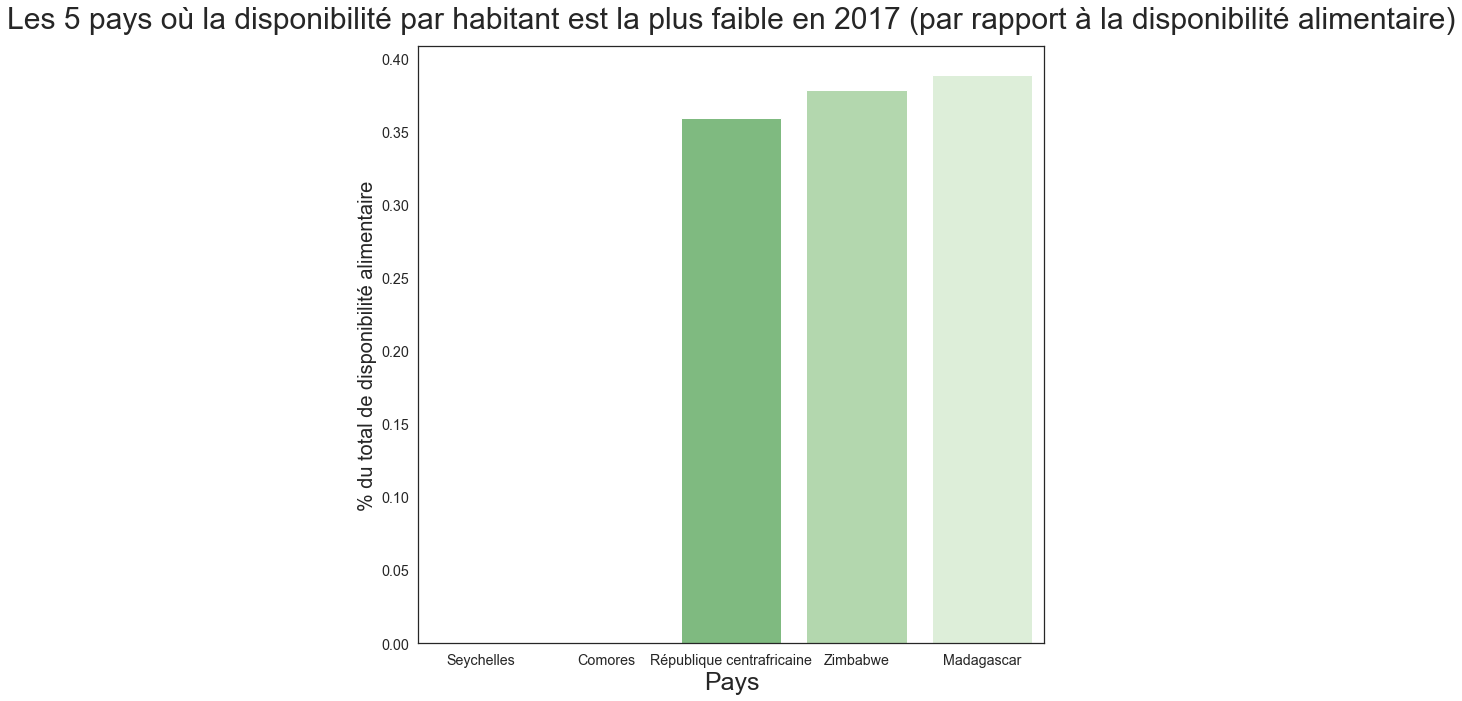

In [31]:
plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone_2017.sort_values(by=["Prop/personne"], ascending=False).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus forte en 2017 (par rapport à la disponibilité alimentaire)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_forte_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

plt.figure(figsize=(10,10))

sns.barplot(data=dispo_zone_2017.sort_values(by=["Prop/personne"], ascending=True).head(), x="Zone", y="Prop/personne", palette="Greens_r")
plt.xlabel("Pays", fontsize=25)
plt.ylabel("% du total de disponibilité alimentaire", fontsize=20)
plt.title("Les 5 pays où la disponibilité par habitant est la plus faible en 2017 (par rapport à la disponibilité alimentaire)", y=1.02, fontsize=30)
plt.savefig("dispo_habitant_ali_faible_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

# 6. Etude de l'aide alimentaire depuis 2013 :

## Préparation des dataframes :

In [32]:
total_aide = aide_df.groupby(['Pays bénéficiaire']).sum().sort_values(by=['Valeur'], ascending=False)
total_aide = total_aide[['Valeur']]
total_aide.reset_index(0, inplace=True)
total_aide = total_aide.head(10)

total_aide_sum = total_aide['Valeur'].sum()
total_aide['Proportion'] = (total_aide['Valeur']/ total_aide_sum)*100
total_aide_prop = total_aide.sort_values(by=['Proportion'], ascending=False).head(10)

aide = aide_df.groupby(['Pays bénéficiaire']).sum()
aide = pd.merge(left=aide, right=merged_pop, how="right", left_on="Pays bénéficiaire", right_on="Zone")
aide_region = aide[['Valeur', 'Region Name']]
aide_region = aide.groupby(['Region Name']).sum().reset_index()

aide_tot = aide_region['Valeur'].sum()
aide_region['Proportion'] = (aide_region['Valeur']/aide_tot)*100

## Recherche des pays ayant reçu le plus d'aide depuis 2013 :

### En quantité totale (en millions de tonnes) :

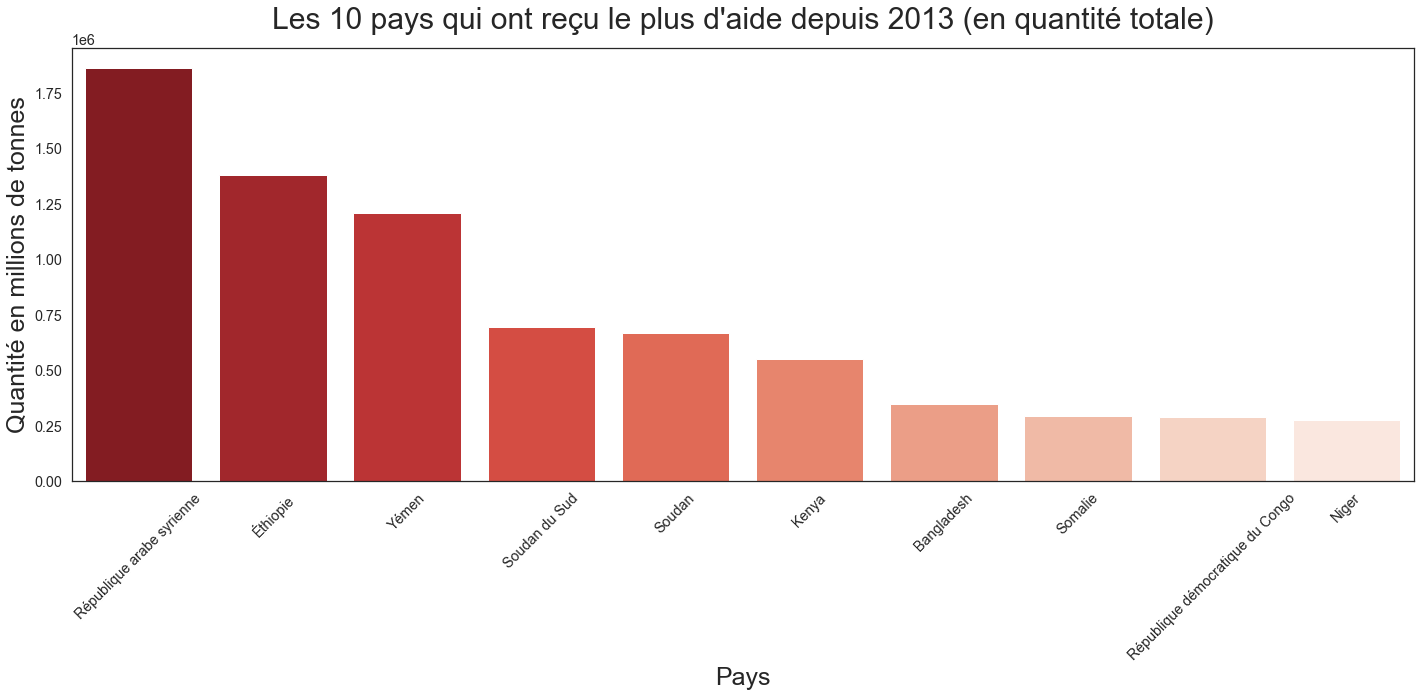

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x=total_aide['Pays bénéficiaire'], y=total_aide['Valeur'], palette="Reds_r")
plt.xlabel("Pays", fontsize=25)
plt.xticks(rotation=45)
plt.ylabel("Quantité en millions de tonnes", fontsize=25)
plt.title("Les 10 pays qui ont reçu le plus d'aide depuis 2013 (en quantité totale)", y=1.03, fontsize=30)
plt.savefig("aide_recu_pays_qte.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

### En % de l'aide totale distribuée :

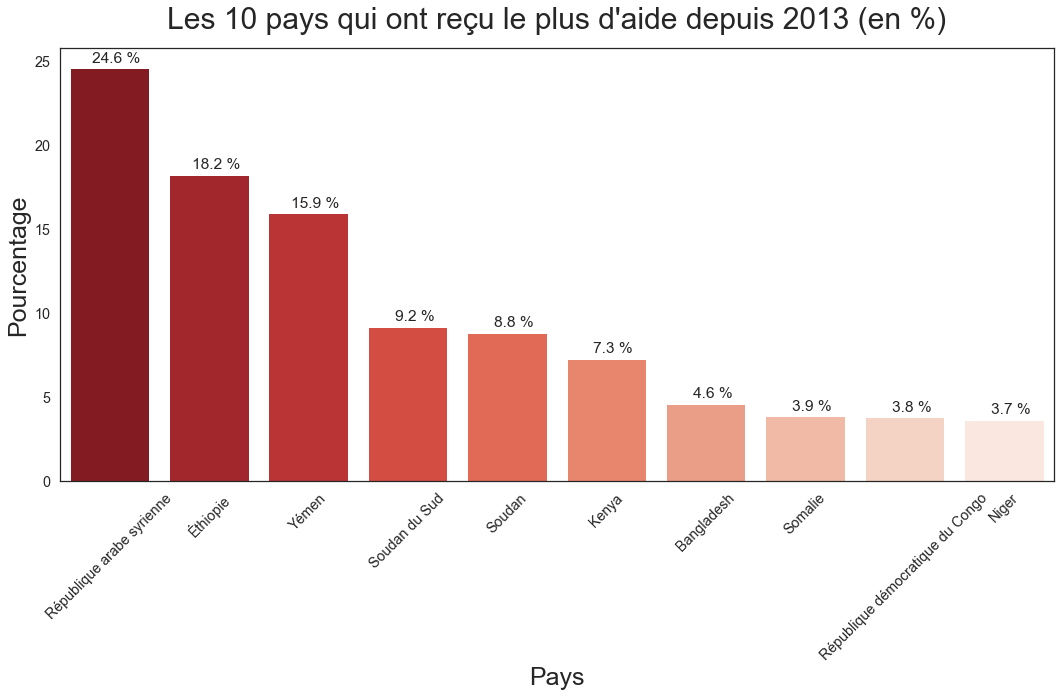

In [34]:
plt.figure(figsize=(15,10))
graph = sns.barplot(x=total_aide_prop['Pays bénéficiaire'], y=total_aide_prop['Proportion'], palette="Reds_r")

for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(7, 10), 
                   textcoords='offset points') 

plt.xlabel("Pays", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.xticks(rotation=45)
plt.title("Les 10 pays qui ont reçu le plus d'aide depuis 2013 (en %)", y=1.03, fontsize=30)
plt.savefig("aide_recu_pays_prop.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

## Répartition de l'aide distribuée par régions :

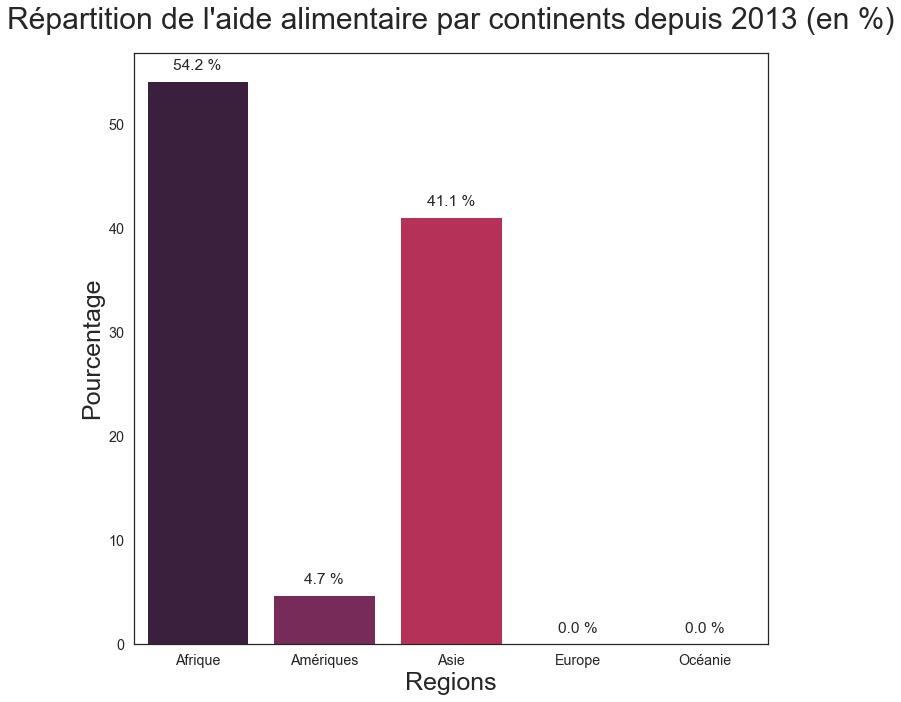

In [35]:
plt.figure(figsize=(10,10))
graph = sns.barplot(x=aide_region['Region Name'], y=aide_region['Proportion'], palette="rocket")


for p in graph.patches: 
    graph.annotate(format(round(p.get_height(),1), '.1f')+" %",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 

plt.xlabel("Regions", fontsize=25)
plt.ylabel("Pourcentage", fontsize=25)
plt.title("Répartition de l'aide alimentaire par continents depuis 2013 (en %)", y=1.03, fontsize=30)
plt.savefig("aide_recu_region_prop.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()

# 7. Etude de l'utilisation de céréales :

## En 2013 (données originales) :

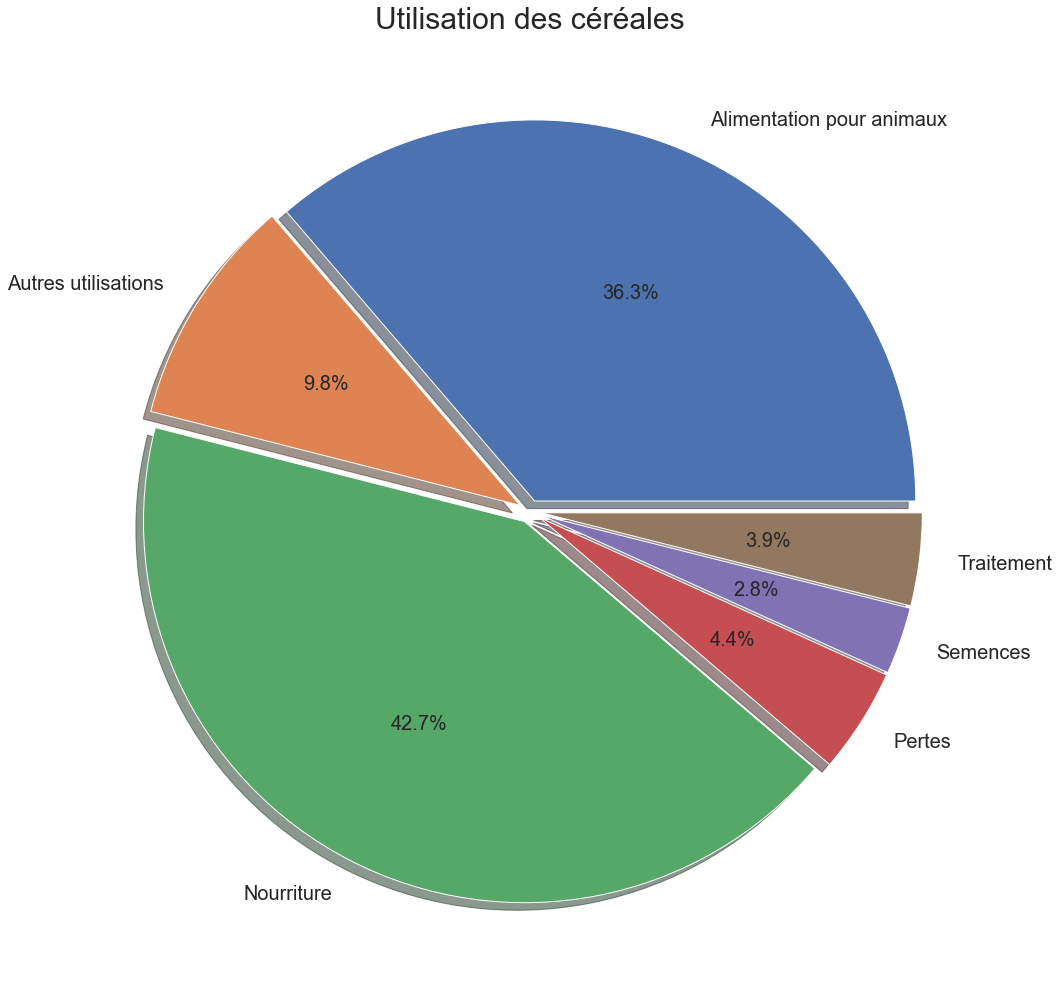

In [36]:
dispo_cere = dispo_df.loc[(dispo_df["Produit"] == "Avoine") | 
                          (dispo_df["Produit"] == "Blé") | 
                          (dispo_df["Produit"] == "Riz (Eq Blanchi)") | 
                          (dispo_df["Produit"] == "Orge") |
                          (dispo_df["Produit"] == "Maïs") |
                          (dispo_df["Produit"] == "Millet") | 
                          (dispo_df["Produit"] == "Céréales, Autres") | 
                          (dispo_df["Produit"] == "Seigle") |
                          (dispo_df["Produit"] == "Sorgho")]

plt.figure(figsize=(15,15))

labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes = [(dispo_cere['Aliments pour animaux'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_cere['Autres Utilisations'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_cere['Nourriture'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_cere['Pertes'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_cere['Semences'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_cere['Traitement'].sum()/dispo_cere['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation des céréales", fontsize=30)
plt.savefig("cereales_use_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## En 2017 (données récupérées sur le site de la FAO) :

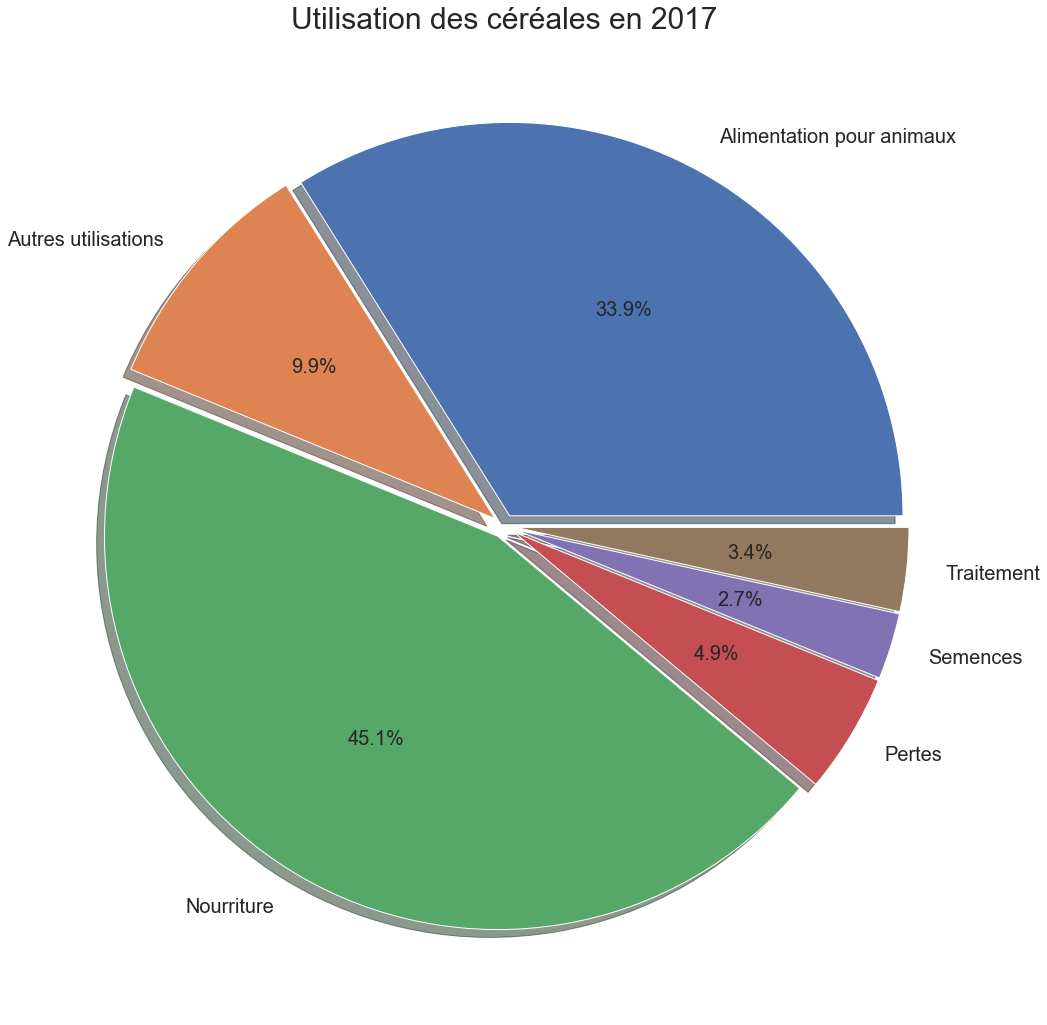

In [37]:
dispo_2017_cere = dispo_2017_use.loc[(dispo_2017_use["Produit"] == "Avoine") | 
                          (dispo_2017_use["Produit"] == "Blé et produits") | 
                          (dispo_2017_use["Produit"] == "Céréales, Autres") |
                          (dispo_2017_use["Produit"] == "Maïs et produits") |
                          (dispo_2017_use["Produit"] == "Millet et produits") |
                          (dispo_2017_use["Produit"] == "Orge et produits") | 
                          (dispo_2017_use["Produit"] == "Riz et produits") | 
                          (dispo_2017_use["Produit"] == "Seigle et produits") |
                          (dispo_2017_use["Produit"] == "Sorgho et produits")]

plt.figure(figsize=(15,15))

labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes = [(dispo_2017_cere['Aliments pour animaux'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_cere['Autres utilisations (non alimentaire)'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_cere['Nourriture'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_cere['Pertes'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_cere['Semences'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100, 
        (dispo_2017_cere['Traitement'].sum()/dispo_2017_cere['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation des céréales en 2017", fontsize=30)
plt.savefig("cereales_use_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Variation entre l'utilisation des céréales pour les animaux et pour la nourriture :

### En 2013 (données originales) :

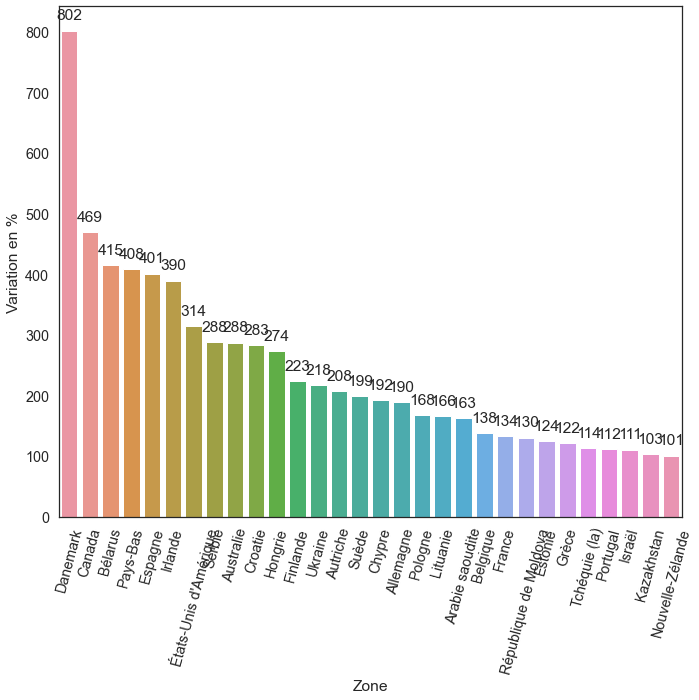

In [38]:
dispo_cere_group = dispo_cere.groupby(["Zone"]).sum().reset_index()
dispo_cere_group['Variation'] = ((dispo_cere_group['Aliments pour animaux']-dispo_cere_group['Nourriture'])/dispo_cere_group['Nourriture'])*100
dispo_cere_group_sort = dispo_cere_group.sort_values(by=['Variation'], ascending=False).head(30)

plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_cere_group_sort, x="Zone", y="Variation")
for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.ylabel("Variation en %")
plt.xticks(rotation=75)
plt.tight_layout()

### En 2017 (données récupérées sur le site de la FAO) :

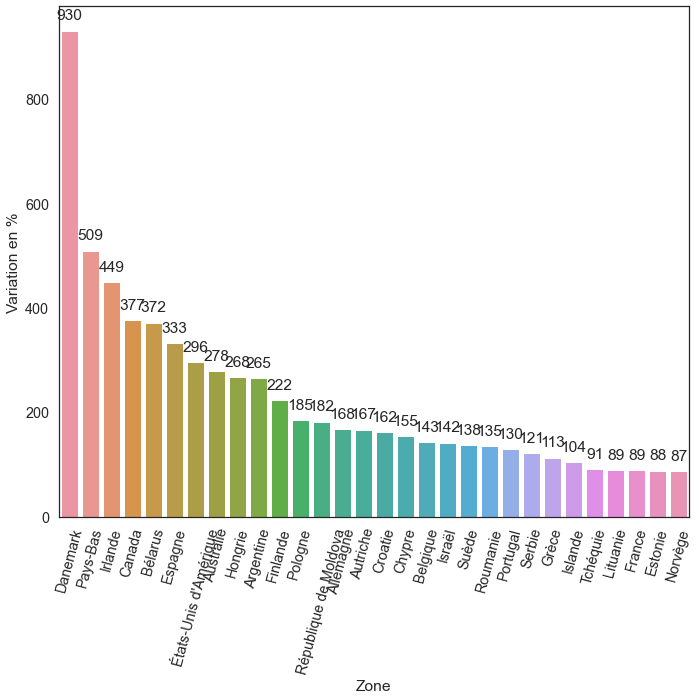

In [39]:
dispo_2017_cere_group = dispo_2017_cere.groupby(["Zone"]).sum().reset_index()
dispo_2017_cere_group['Variation'] = ((dispo_2017_cere_group['Aliments pour animaux']-dispo_2017_cere_group['Nourriture'])/dispo_2017_cere_group['Nourriture'])*100
dispo_2017_cere_group_sort = dispo_2017_cere_group.sort_values(by=['Variation'], ascending=False).head(30)

plt.figure(figsize=(10,10))
graph = sns.barplot(data=dispo_2017_cere_group_sort, x="Zone", y="Variation")
for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 15), 
                   textcoords='offset points') 
plt.ylabel("Variation en %")
plt.xticks(rotation=75)
plt.tight_layout()

# 8. Etude sur l'utilisation du manioc en Thaïlande 

## En 2013 (données originales) :

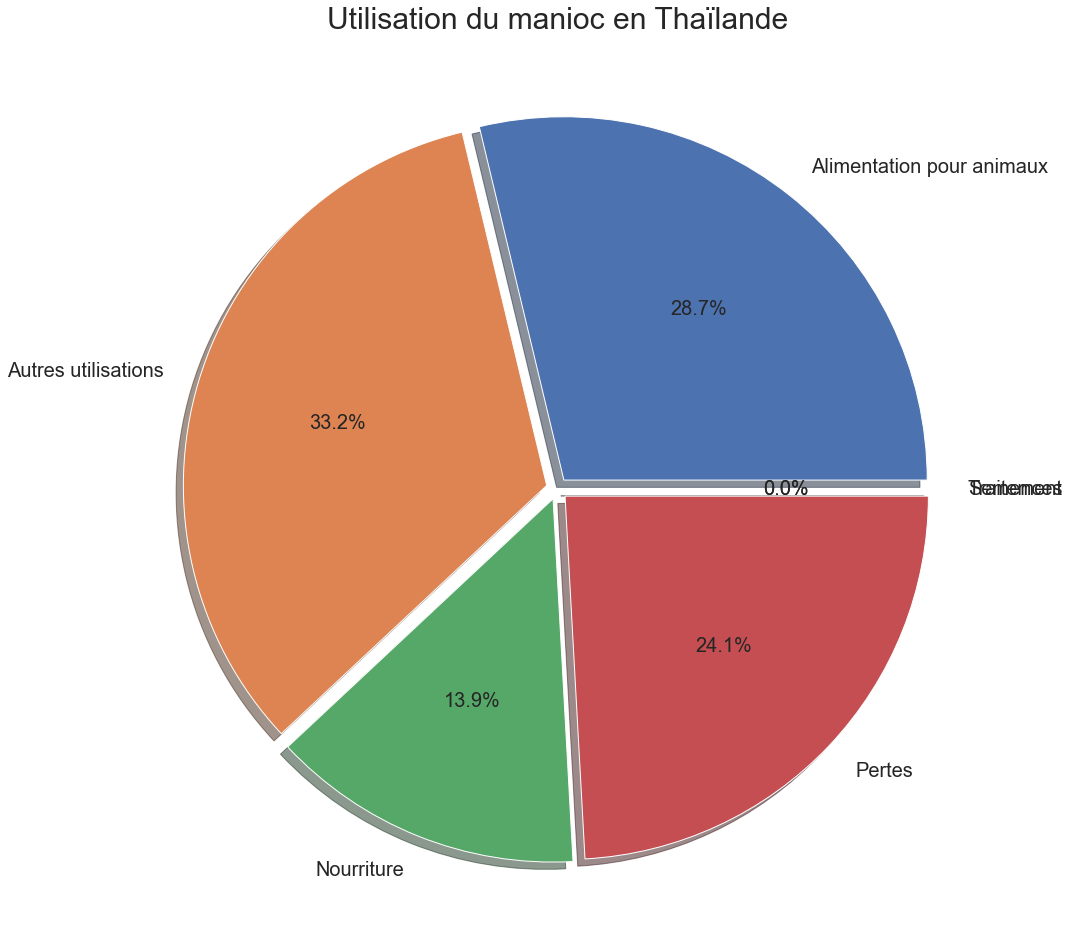

In [40]:
dispo_manioc = dispo_df.loc[(dispo_df['Produit'] == "Manioc") & (dispo_df['Zone'] == "Thaïlande")]


plt.figure(figsize=(15,15))

labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes = [(dispo_manioc['Aliments pour animaux'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc['Autres Utilisations'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc['Nourriture'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc['Pertes'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc['Semences'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc['Traitement'].sum()/dispo_manioc['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation du manioc en Thaïlande", fontsize=30)
plt.savefig("manioc_thai_2013.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## En 2017 (données récupérées sur le site de la FAO) :

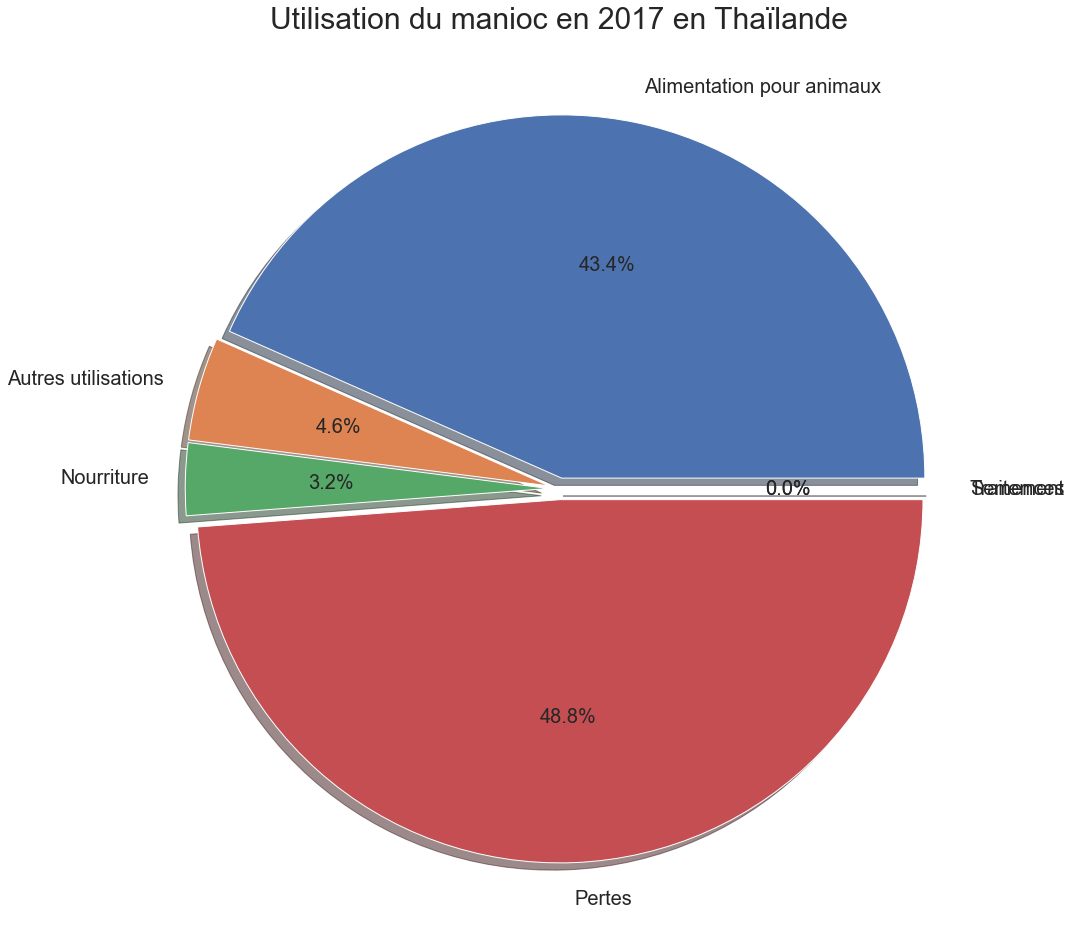

In [41]:
dispo_manioc_2017 = dispo_2017_use.loc[(dispo_2017_use['Produit'] == "Manioc et produits") & (dispo_2017_use['Zone'] == "Thaïlande")]


plt.figure(figsize=(15,15))

labels = ["Alimentation pour animaux", "Autres utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]
sizes = [(dispo_manioc_2017['Aliments pour animaux'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc_2017['Autres utilisations (non alimentaire)'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc_2017['Nourriture'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100, 
        (dispo_manioc_2017['Pertes'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100,
        (dispo_manioc_2017['Semences'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100,
        (dispo_manioc_2017['Traitement'].sum()/dispo_manioc_2017['Disponibilité intérieure'].sum())*100]
explode = (0.03,0.03,0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation du manioc en 2017 en Thaïlande", fontsize=30)
plt.savefig("manioc_thai_2017.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()